crm_data.csv
Данные, эмулирующие результат выгрузки из CRM (Customer relationship management) системы, представляют собой таблицу с перечнем самой разной информации о клиенте, доступной в моменте. Как и в реальных CRM-системах, различная информация может храниться в разных системах, иметь разную степень свежести, и иметь еще множество увлекательных для аналитиков свойств. 
Таблица содержит информацию о 2899 клиентах и содержит 20 столбцов с различной информацией о клиентах. Для участников самое важное в этих данных — поле clnt_id, соответствующее clnt_id в других таблицах, предоставленных в рамках соревнования. 
Самые важные поля в этой таблице следующие:

clnt_id — идентификатор клиентов банка;
is_premium — целевая переменная, которую нужно предсказать: 1- клиенты, имеющие премиальную карту; 0 - обычные клиенты. Целевая переменная доступна не для всех клиентов и именно в ее предсказании для новых клиентов и состоит задача соревнования. 
В процессе генерации предоставленного синтетического файла ни один реальный клиент не пострадал :) 

crm_goose.csv
По сценарию соревнования это те данные, которые остались в наследство от прежнего дата саентиста. Этот специалист уже ранее подступался к данной задаче, но не успел ни довести ее до пилотирования, ни передать по ней дела — столь сильно было желание сменить поле деятельности (мы его иногда прекрасно понимаем). К сожалению, этот специалист не только не слышал про воспроизводимость и REPA-ML, но нам даже не удалось отыскать код, воспроизводящий эти данные. Однако, сами данные уже содержат ряд признаков, которые могут помочь решить задачу. Помогут ли эти признаки участникам — узнаем на Data Halloween, когда мы раскроем backstage про подготовку задачи.

sample_subm
Это пример тестового файла, который вам нужно отправить продакт-менеджеру, пригласившему вас помочь с задачей предсказания премиальных клиентов. В банке стало больше новых клиентов и нужно предсказать, станут ли они пользователями премиальных карт или нет. Файл имеет следующую структуру:

clnt_id — идентификаторы новых клиентов банка, для которых нужно предсказать, станут ли они премиальными клиентами;
is_premium — бинарная метка вашего предсказания: 1 - станут премиальными клиентами; 0 - не станут. Обратите внимание: продакт-менеджера не интересуют ни вероятности, ни расстояния до разделяющих гиперплоскостей. Нужны просто четкие предсказания: станет или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crm_data=pd.read_csv('crm_data.csv')
crm_data

clnt_id  clnt_gender  clnt_age clnt_device       clnt_device_get  \
0        2001          1.0        32  sO@*%lun08  vgIXi0LgoZHQ71Mmekm1   
1        2006          1.0        20  )!%OA9qpZP  lmE6l7DelsqZNYgxcsAZ   
2        2012          0.0        24  IgSHlRCsd#  yhUtC1GSVpWWNPCI9EYo   
3        2013          0.0        42  SSbZb5Hpun  TM4ptl78Lwzhng7PAY4G   
4        2014          0.0        25  N)Eb*EJXD4  lmE6l7DelsqZNYgxcsAZ   
...       ...          ...       ...         ...                   ...   
2894     4984          1.0        24  !Zusbz4GJ@  DUPFnmZiv2kqwJJgYK0p   
2895     4986          0.0        22  YBjx-RAB9!  4CdUr2g9UqwFuqdVaWdO   
2896     4987          0.0        24  nR4%tYIRXv  qhf9RhOTHsX15m3UzA94   
2897     4991          0.0        24  ^+3(I8C%&b                   NaN   
2898     4994          0.0        24  4(*Kax8&YS  Xlh4OkBJvFkCElKYmKNQ   

      has_car  has_estate  clnt_children  clnt_income  clnt_pick  \
0         0.0         0.0              1       180000          2   
1         1.0         0.0              0       250000          5   
2         NaN         0.0              0       310000          4   
3         1.0         0.0              1       110000          8   
4         1.0         0.0              1       300000          8   
...       ...         ...            ...          ...        ...   
2894      0.0         0.0              1       370000          5   
2895      0.0         1.0              0            0          2   
2896      1.0         0.0              0     21000000          4   
2897      1.0         0.0              3       380000          5   
2898      0.0         0.0              0        60000          4   

      clnt_fortune  clnt_status  clnt_system  spend_last  spend_level  \
0                6            3            1        1428          320   
1               11            4            1        1428         1000   
2                8            4            1        1428         1750   
3                9            6            1        1428         1180   
4               10            4            1        1428         1000   
...            ...          ...          ...         ...          ...   
2894            28            0            1        1427          100   
2895            30            6            1        1428         1000   
2896            31           27            1        1428         1000   
2897            26           25            1        1428          510   
2898            29            6            3        1428          100   

      spend_points  manager_contact  is_premium  
0               76           7227.0         1.0  
1               66           7227.0         1.0  
2               18           7233.0         1.0  
3               30           7227.0         1.0  
4               24           7227.0         1.0  
...            ...              ...         ...  
2894             0              NaN         NaN  
2895             0              NaN         NaN  
2896             0              NaN         NaN  
2897             0              NaN         NaN  
2898             0              NaN         NaN  

[2899 rows x 18 columns]

In [3]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clnt_id          2899 non-null   int64  
 1   clnt_gender      2786 non-null   float64
 2   clnt_age         2899 non-null   int64  
 3   clnt_device      2801 non-null   object 
 4   clnt_device_get  2801 non-null   object 
 5   has_car          2692 non-null   float64
 6   has_estate       2711 non-null   float64
 7   clnt_children    2899 non-null   int64  
 8   clnt_income      2899 non-null   int64  
 9   clnt_pick        2899 non-null   int64  
 10  clnt_fortune     2899 non-null   int64  
 11  clnt_status      2899 non-null   int64  
 12  clnt_system      2899 non-null   int64  
 13  spend_last       2899 non-null   int64  
 14  spend_level      2899 non-null   int64  
 15  spend_points     2899 non-null   int64  
 16  manager_contact  755 non-null    float64
 17  is_premium    

In [4]:
crm_data.describe()

clnt_id  clnt_gender     clnt_age      has_car   has_estate  \
count  2899.000000  2786.000000  2899.000000  2692.000000  2711.000000   
mean   3501.526388     0.502513   104.801311     0.503715     0.148654   
std     865.813819     0.500083   376.473500     0.500079     0.355812   
min    2000.000000     0.000000    19.000000     0.000000     0.000000   
25%    2748.500000     0.000000    23.000000     0.000000     0.000000   
50%    3502.000000     1.000000    26.000000     1.000000     0.000000   
75%    4249.500000     1.000000    31.000000     1.000000     0.000000   
max    4999.000000     1.000000  2001.000000     1.000000     1.000000   

       clnt_children   clnt_income    clnt_pick  clnt_fortune  clnt_status  \
count    2899.000000  2.899000e+03  2899.000000   2899.000000  2899.000000   
mean        0.332873  8.736288e+05     4.456019     19.514660     9.270093   
std         0.579074  4.225547e+06     2.879040      5.048834     6.429195   
min         0.000000  0.000000e+00     0.000000      5.000000     0.000000   
25%         0.000000  1.000000e+05     2.000000     16.000000     4.000000   
50%         0.000000  2.000000e+05     4.000000     20.000000     9.000000   
75%         1.000000  3.000000e+05     7.000000     23.000000    15.000000   
max         4.000000  3.900000e+07     9.000000     34.000000    31.000000   

       clnt_system   spend_last    spend_level  spend_points  manager_contact  \
count  2899.000000  2899.000000    2899.000000    2899.00000       755.000000   
mean      1.223870  1427.168679     839.284926      24.61573      7215.978808   
std       0.469096     6.500000    2716.802823      65.01844        33.099153   
min       1.000000  1295.000000       0.000000       0.00000      7122.000000   
25%       1.000000  1428.000000     200.000000       0.00000      7227.000000   
50%       1.000000  1428.000000     427.000000       0.00000      7227.000000   
75%       1.000000  1428.000000     980.000000       0.00000      7227.000000   
max       3.000000  1428.000000  120000.000000     594.00000      7248.000000   

        is_premium  
count  1538.000000  
mean      0.469441  
std       0.499228  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Есть выбросы по возрасту, 2001 явно кто-то перепутал дату рождения и возраст, плюс среднее превышает в 3 раза 75% квартиль. У 75+ нету недвижимости. Среднее по доходу превышает 75% квартиль. Spend last очень странные значения, spend_level надо изучить вместе со spend_points и manager_contact.

<AxesSubplot:>

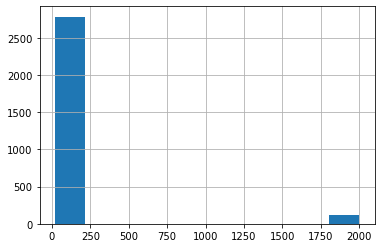

In [5]:
crm_data.clnt_age.hist()

<AxesSubplot:>

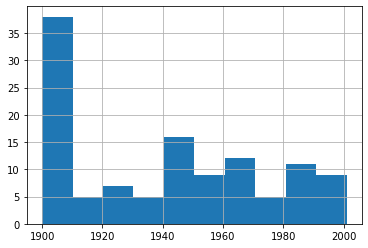

In [6]:
crm_data.loc[crm_data['clnt_age']>1700].clnt_age.hist()

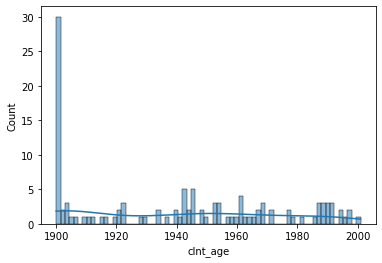

In [7]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1700].clnt_age, kde=True,bins=70)
plt.show()

In [8]:
len(crm_data.loc[crm_data['clnt_age']==1900])

30

1900 заменили как нет данных, надо будет заменить их. С остальными пока не знаю что делать.

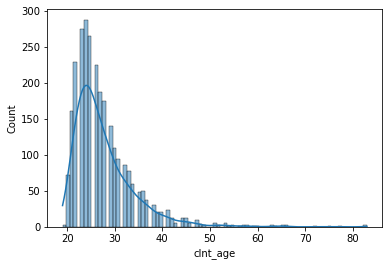

In [9]:
sns.histplot(crm_data.loc[crm_data['clnt_age']<250].clnt_age, kde=True,bins=85)
plt.show()

In [10]:
max(crm_data.loc[crm_data['clnt_age']<250].clnt_age)

83

In [11]:
min(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

1902

Если у кого-то стоит год 1902, то ему уже 118 лет, что вряд ли вероятно, ведь максимум по обычным годам равен лишь 83, плюс скорее всего это будет сильно влиять на алгоритм, поэтому стоит их поставить в Null

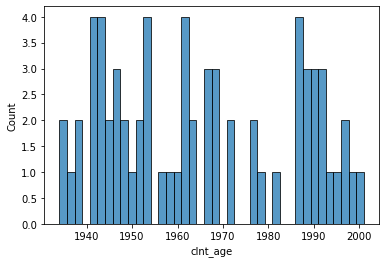

In [12]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1930].clnt_age,bins=40)
plt.show()

In [13]:
len(crm_data.loc[crm_data['clnt_age']>1930].clnt_age)

67

In [14]:
len(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

87

20 значений с высокой вероятностью ошибки, лучше их будет тоже заменить на Null

In [15]:
crm_data.loc[(crm_data['clnt_age']>=1900) & (crm_data['clnt_age']<1940),'clnt_age']=np.nan

In [16]:
crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']=2020-crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

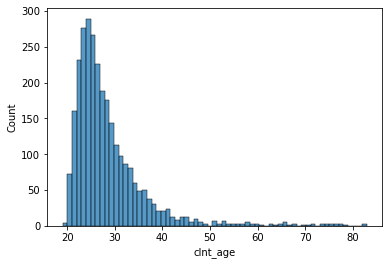

In [17]:
sns.histplot(crm_data.clnt_age)

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

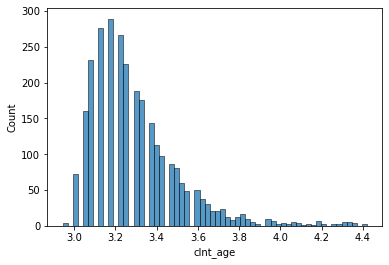

In [18]:
sns.histplot(np.log(crm_data.clnt_age),bins=60)

Распределение похоже на нормальное, но с длинным хвостом справа, поэтому лучше будет прологарифмировать и сохранить как столбец.

In [19]:
crm_data['log_age']=np.log(crm_data.clnt_age)

<AxesSubplot:>

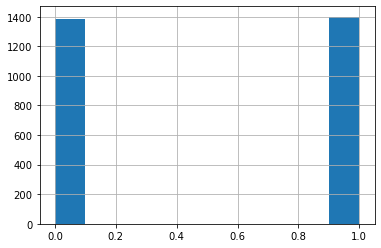

In [20]:
crm_data.clnt_gender.hist()

In [21]:
crm_data.clnt_device.unique()

array(['sO@*%lun08', ')!%OA9qpZP', 'IgSHlRCsd#', 'SSbZb5Hpun',
       'N)Eb*EJXD4', '_)nLk%PngJ', 'vJ#XVpcNy6', 'pi&NYvrpiu',
       'NMZa(_ZevK', 'tZet+bbIC_', 'T+BA%psI8c', 'ghOfqAzHdO',
       '+qOE#oK7Bu', 'm1o4W&JCvy', nan, 'Y1+5*e_(9D', 'rcJgTotoi8',
       'KnasAzg4Vf', 'tyOjI2@FcB', 'A&D5V21q5$', '$pffcP&pkj',
       '^+3(I8C%&b', 'Nljw_d_PZV', 'rreI!9jkPq', 'WUn^8@yRRZ',
       'm4Onx$jC_+', '+d)U@Ozdq@', 'R6B&KN5OOi', 'K*)FJ)edcZ',
       '&qrVc7H^jE', '4(*Kax8&YS', '@bM12Da%6&', 'cN50%TMttL',
       '4!5PbGR!VN', 'W@&0muZANj', '6J4&mF&#tl', 'UaSer)d$CZ',
       'y3FVI6dzfi', 'gTkSzDk+OA', 'yJrFzC0McE', 'nR4%tYIRXv',
       'AWrJqks-tw', '!Zusbz4GJ@', 'sUse$3S4Z%', '4aQwCtPL4(',
       'H#s_lw9F_R', 'exk&etBeLF', 'Bg01S^%Jfy', 'jso!fQ*Q7x',
       'py_Z4O$Gg+', '_cbxM0a-Yi', '-(Tu#R_@lh', 'zzhjn9-Ew-',
       'xAZj4fx97F', 'vB5-)b$ZR+', '_)nAgN9)Gz', 'fXm+BayjVA',
       'YBjx-RAB9!', '&UiIgr6b05', 'C_QpEX%9CB', '(O@$+)2-Iq'],
      dtype=object)

С учетом их примерно одинакового непонятного сложения, лучше будет просто перевести с помощью labelencoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
crm_data['le_device']=le.fit_transform(crm_data.clnt_device.astype(str))

<AxesSubplot:>

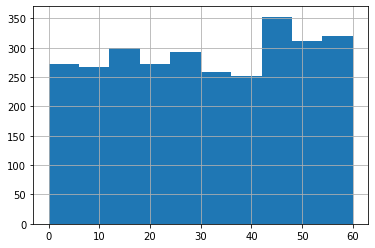

In [24]:
crm_data.le_device.hist()

Распределено примерно равномерно

In [25]:
crm_data.clnt_device_get.unique()

array(['vgIXi0LgoZHQ71Mmekm1', 'lmE6l7DelsqZNYgxcsAZ',
       'yhUtC1GSVpWWNPCI9EYo', 'TM4ptl78Lwzhng7PAY4G',
       'EAE3RcxIwQfn3oIbcXZN', 'RD8BUJjq4e1qknku300N',
       'yHrDLKQ3V9TnmM5OZdNu', 'Xlh4OkBJvFkCElKYmKNQ',
       'liZPCZF6tFgGEt1bTPHs', 'noI8N7cvgfYPRswJVqSt',
       '4tn4ahgRkWMzsSCk5tnp', 'zY5grwt3TK2vXDNOXNtQ',
       'xwVatkCS227il3xATBFE', 'Jw5OmlNzw1TWSySS8Kz6',
       'Wlb9y8b5EujLakHZQZ0D', 'SYy2B7hNPyV792L5eCqu',
       'RKcjWOC0kWGyGsDi325Q', 'duj1wNy6PQygCaQYt6ze',
       'apqNDBwDXCytWs6F1c29', 'a25dNMsZKjRHnhp7WJkD',
       'zPz024CQIonY5H9jYIve', 'vtFJx028ksA5j1r4Gevb',
       '6153L0t8XPPwrqlaHrPc', 'U5K7lQEiD5wBoxQfY6Tz',
       'qhf9RhOTHsX15m3UzA94', 'JZ0KLFgkXP3A9WMANoni',
       'nrQMSSqhv27ILkeKQI8X', 'NJRRltMExbMcFROsvdGD',
       'ZRg0ZwLzu2FL5jted9eX', 'AEvBGGIi1TYMZpsS5CoK',
       'DAHGwLtn4JPcATVSWFHk', 'u6H8Em4pxxagN7S8TAR5',
       'DLtGblMWq46ducD1uhFp', 'C6o0rm2Kne9WJe6IrQhX',
       'jEt2cvpo9kv8BjV7S6ay', 'Jsdxxb8QCqG5031DdLI5',
       'hp

In [26]:
crm_data['le_device_get']=le.fit_transform(crm_data.clnt_device_get.astype(str))

<AxesSubplot:>

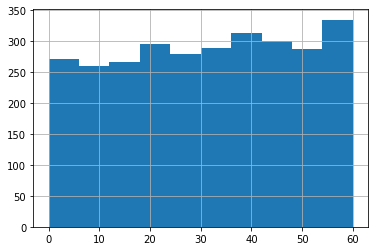

In [27]:
crm_data.le_device_get.hist()

То же самое

<AxesSubplot:>

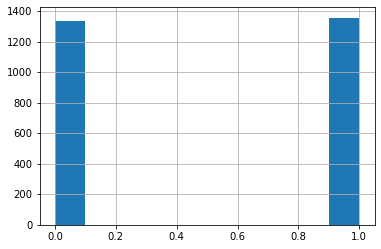

In [28]:
crm_data.has_car.hist()

has_estate       2711 non-null   float64

 7   clnt_children    2899 non-null   int64  
 
 8   clnt_income      2899 non-null   int64  
 
 9   clnt_pick        2899 non-null   int64  
 
 10  clnt_fortune     2899 non-null   int64  
 
 11  clnt_status      2899 non-null   int64  
 
 12  clnt_system      2899 non-null   int64  
 
 13  spend_last       2899 non-null   int64  
 
 14  spend_level      2899 non-null   int64  
 
 15  spend_points     2899 non-null   int64  
 
 16  manager_contact  755 non-null    float64
 
 17  is_premium       1538 non-null   float64

<AxesSubplot:>

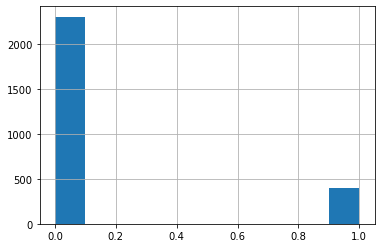

In [29]:
crm_data.has_estate.hist()

Вот тут резкий перекос

<AxesSubplot:>

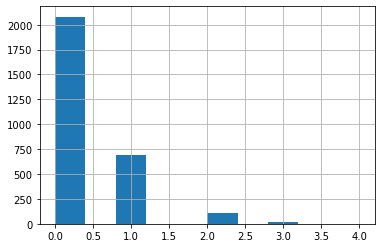

In [30]:
crm_data.clnt_children.hist()

Логарифмическое распределение получается. Окей.

Интересная странность в том, что владение недвижимостью указали не все, в то же время про детей рассказали все, пока не знаю зачем, но интересно.

<AxesSubplot:>

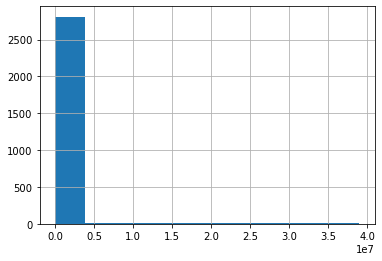

In [31]:
crm_data.clnt_income.hist()

Можно ли опираться на этот столбец? Если данных очень мало.

<AxesSubplot:>

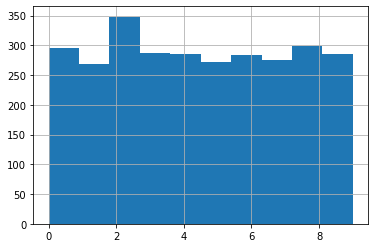

In [32]:
crm_data.clnt_pick.hist()

<AxesSubplot:>

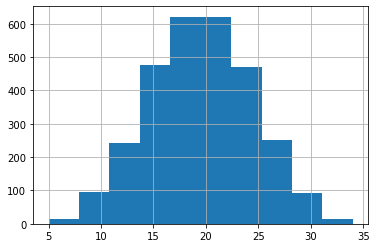

In [33]:
crm_data.clnt_fortune.hist()

Слишком красиво, слишком ровно, слишком странно.

Проблема еще в том, что не особо понятно, что этот столбец значит. Ладно.

<AxesSubplot:>

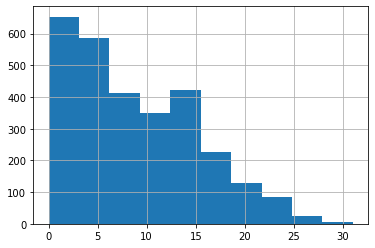

In [34]:
crm_data.clnt_status.hist()

Очень странный треугольник, треугольное распределение с модой вначале?

<AxesSubplot:>

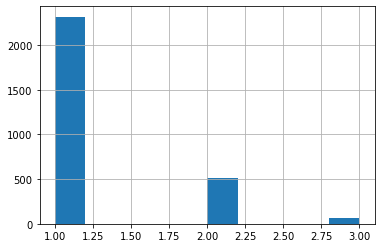

In [35]:
crm_data.clnt_system.hist()

Что-то сильно напоминающее логарифмическое распределение

<AxesSubplot:>

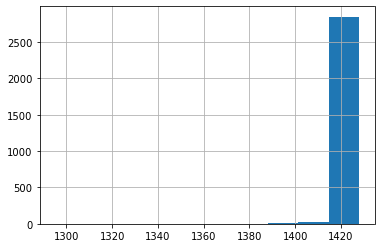

In [36]:
crm_data.spend_last.hist()

Похоже на крайне бесполезный столбец, но пока непонятно как он соотносится с остальными

<AxesSubplot:>

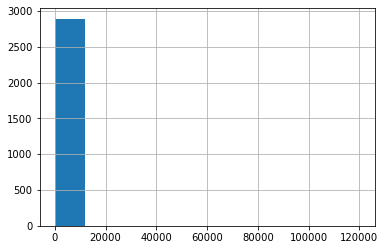

In [37]:
crm_data.spend_level.hist()

In [38]:
crm_data.loc[crm_data['spend_level']>20000].spend_level

335      60000
1254    120000
Name: spend_level, dtype: int64

Всего лишь два значения больше 20к, а что у них по премиуму?

In [39]:
crm_data.loc[crm_data['spend_level']>20000].is_premium

335     1.0
1254    0.0
Name: is_premium, dtype: float64

У них уже проставлен, причем самое интересное то, что у наибольшего spend_level не премиум, поэтому может негативно влиять на алгоритм, надо будет посмотреть потом корреляции общие и определить, стоит ли удалять.

<AxesSubplot:>

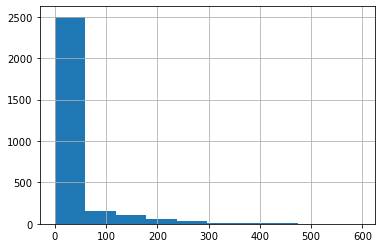

In [40]:
crm_data.spend_points.hist()

In [41]:
crm_data.loc[crm_data['spend_points']>300].spend_points,crm_data.loc[crm_data['spend_points']>300].is_premium

(15     516
 45     332
 56     335
 91     367
 95     404
 155    429
 168    434
 178    344
 189    334
 220    476
 249    354
 253    359
 271    398
 325    371
 329    358
 336    367
 381    336
 384    362
 394    362
 454    412
 461    306
 465    594
 475    375
 545    316
 565    403
 576    388
 633    462
 635    327
 657    442
 716    327
 Name: spend_points, dtype: int64,
 15     1.0
 45     1.0
 56     1.0
 91     1.0
 95     1.0
 155    1.0
 168    1.0
 178    1.0
 189    1.0
 220    1.0
 249    1.0
 253    1.0
 271    1.0
 325    1.0
 329    1.0
 336    1.0
 381    1.0
 384    1.0
 394    1.0
 454    1.0
 461    1.0
 465    1.0
 475    1.0
 545    1.0
 565    1.0
 576    1.0
 633    1.0
 635    1.0
 657    1.0
 716    1.0
 Name: is_premium, dtype: float64)

У всех исключений премиум

<AxesSubplot:>

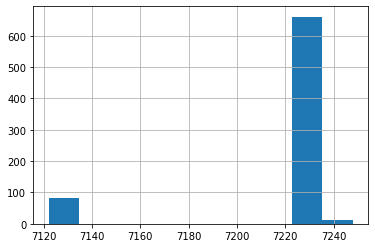

In [42]:
crm_data.manager_contact.hist()

Мало данных, очень странное распределение, может повлиять не самым полезным образом.

<AxesSubplot:>

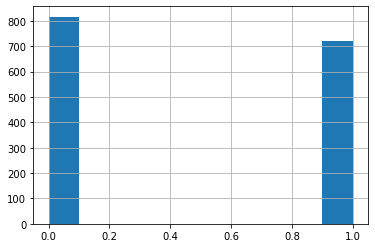

In [43]:
crm_data.is_premium.hist()

In [44]:
crm_data.columns

Index(['clnt_id', 'clnt_gender', 'clnt_age', 'clnt_device', 'clnt_device_get',
       'has_car', 'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level', 'spend_points', 'manager_contact', 'is_premium',
       'log_age', 'le_device', 'le_device_get'],
      dtype='object')

In [45]:
crm_data.drop(['clnt_age'],axis=1,inplace=True)

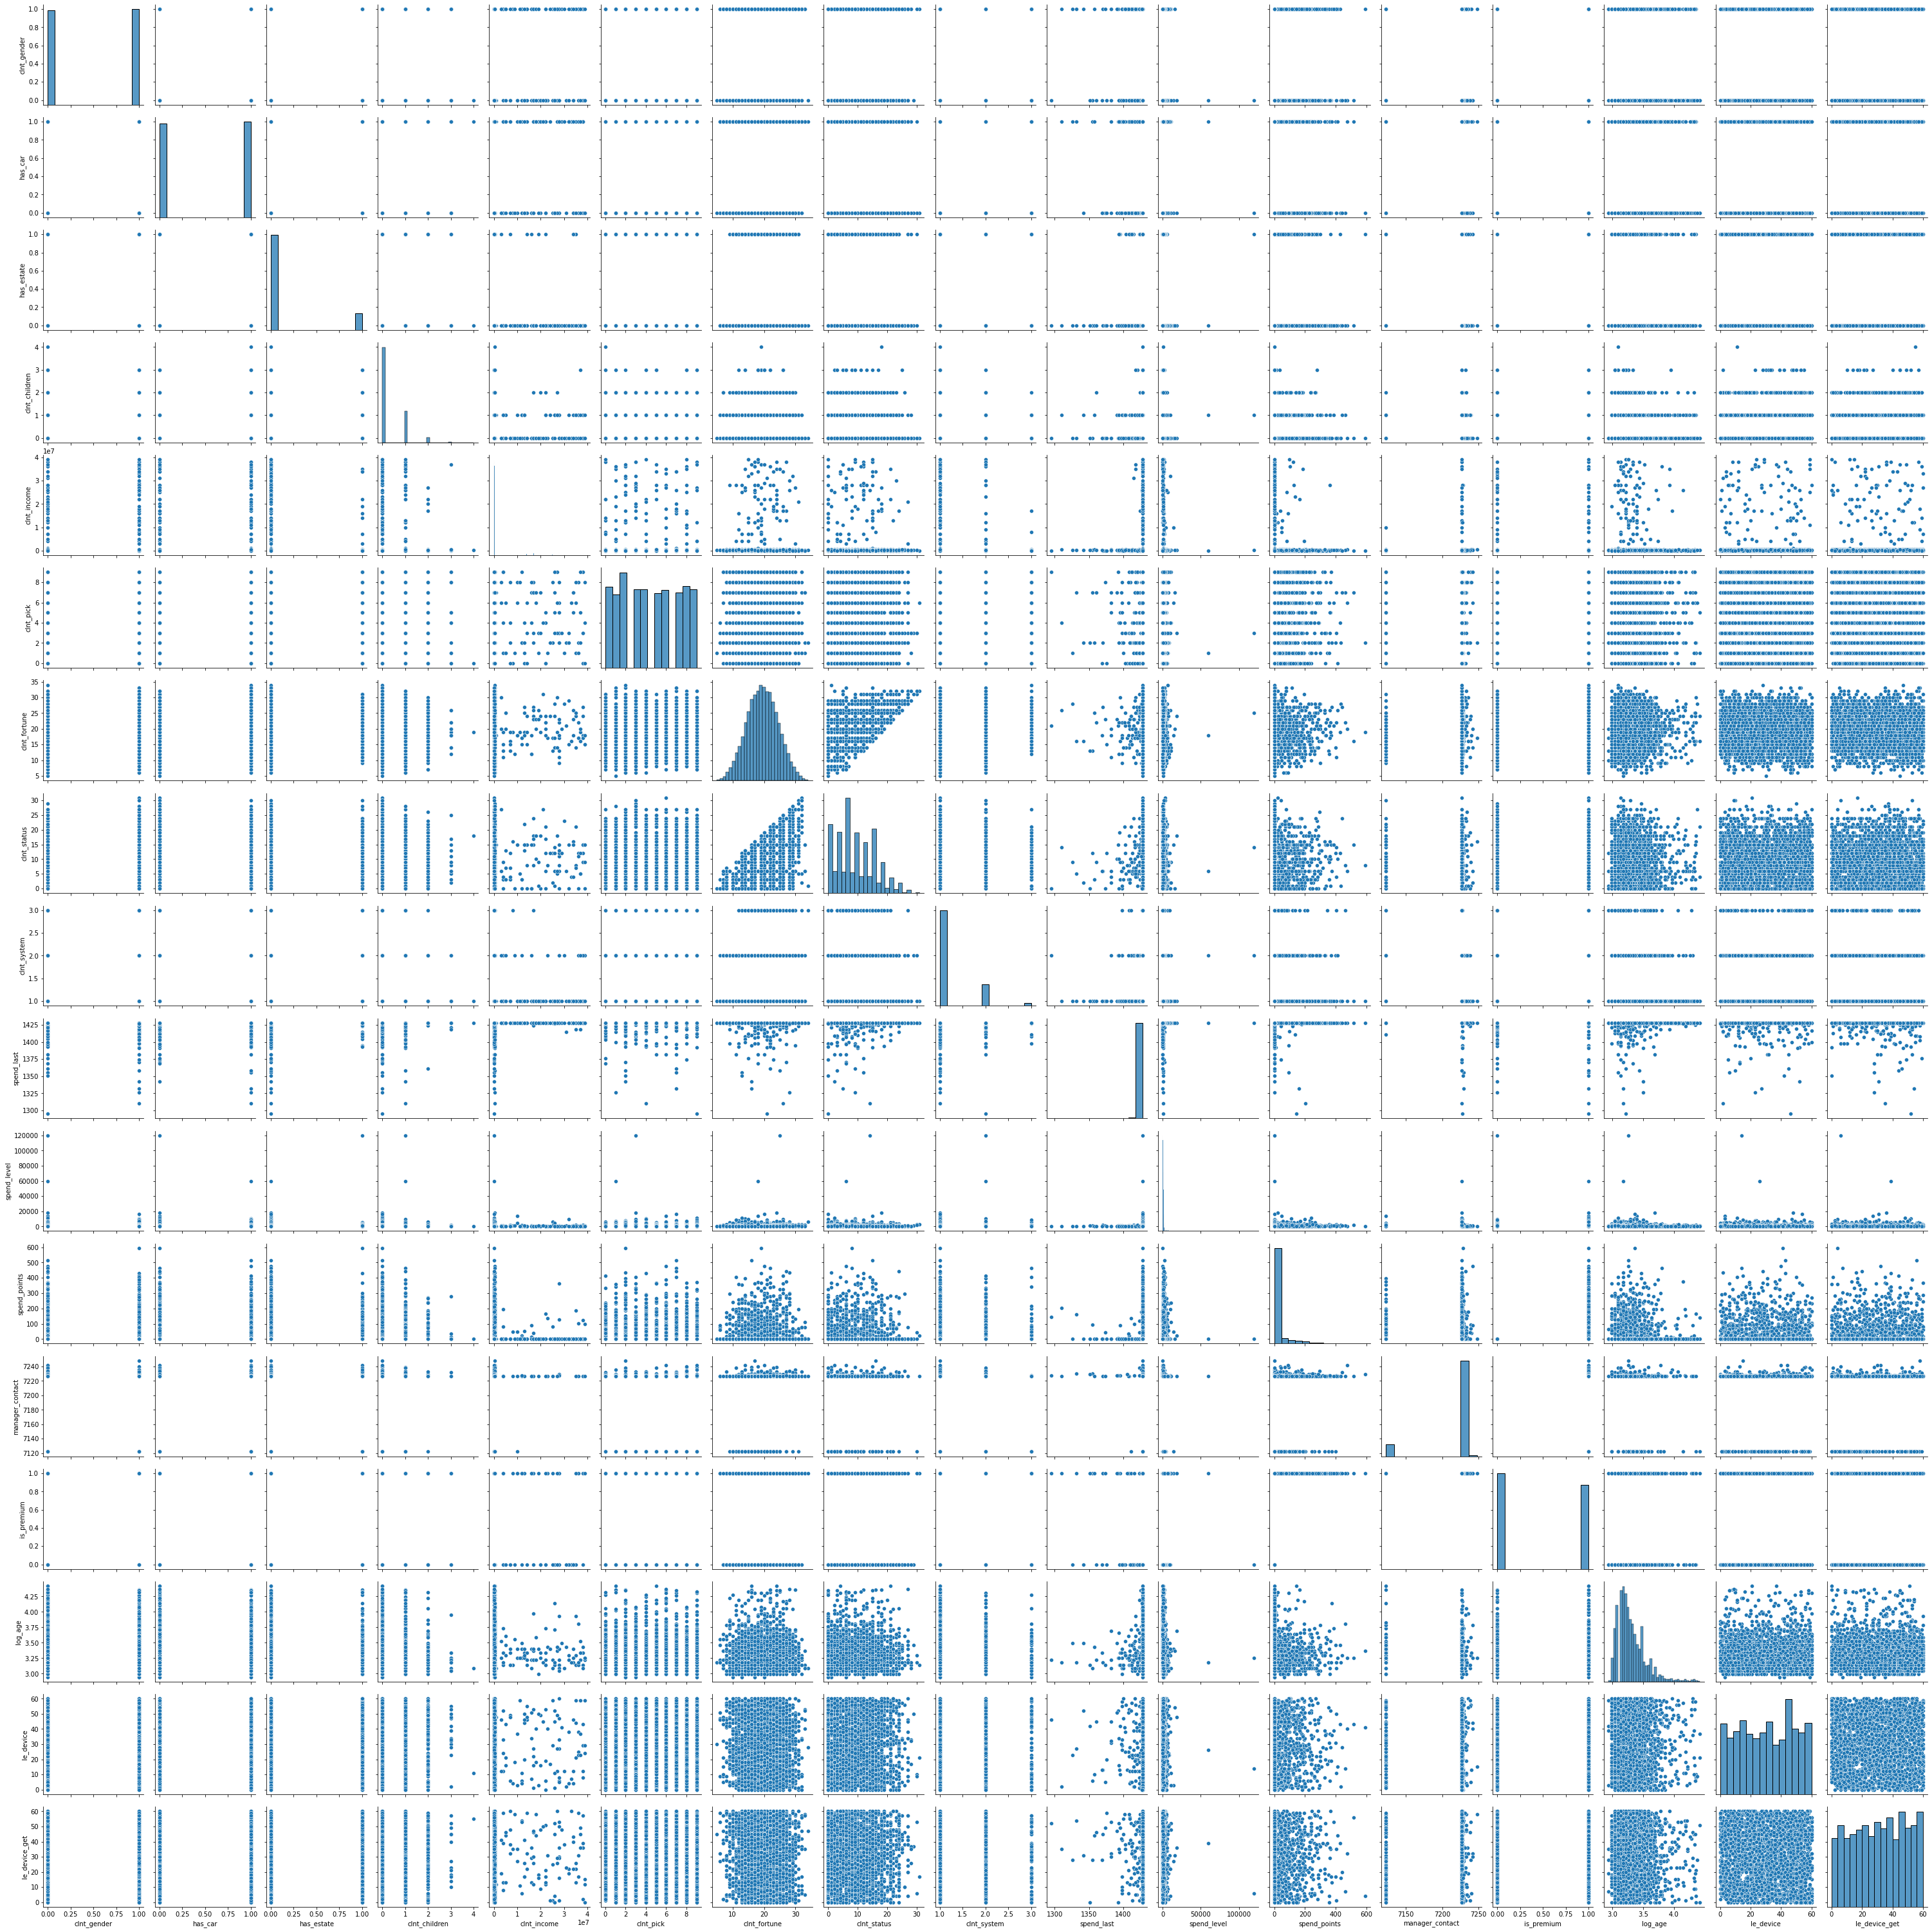

In [46]:
sns.pairplot(crm_data.drop(['clnt_id'],axis=1))

Вот так, если окинуть взглядом, многие графики выглядит странно, например максимально нормальное распределение, три параллелограмма, треугольники, многие интересно с исследуемой переменной пересекаются

<AxesSubplot:xlabel='le_device', ylabel='le_device_get'>

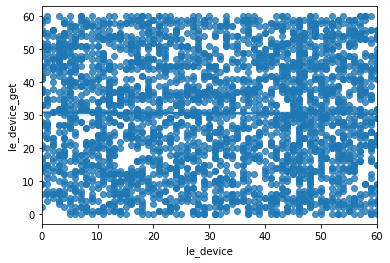

In [47]:
sns.regplot(data=crm_data,x='le_device',y='le_device_get')

создается ощущение, что корреляция очень высока у этих двух переменных

In [48]:
crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique())

(array([42, 45, 38, 33, 51, 55, 21, 50, 20, 41, 27, 44, 48, 37, 28, 24,  9,
        59,  2, 14, 16,  6, 58, 17, 52, 13, 56]),
 27)

In [49]:
crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique())

(array([35, 25, 27, 18, 50, 30, 49, 11, 23, 12, 51, 60, 59, 54, 34, 55, 46,
        37, 15, 45, 47, 28,  4, 20,  7,  6, 33, 26,  9, 52, 43, 14]),
 32)

In [50]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device']==i,'le_device_get'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

27  32  25  30  35  37  36  29  28  33  35  35  37  31  28  27  37  34  32  35  31  35  33  27  32  32  34  34  34  30  26  32  31  34  28  21  32  35  27  33  27  32  31  35  37  35  52  34  43  32  41  33  36  36  36  32  35  34  25  33  26  

(21.0, 33.0, 52.0)

Если у клиента определенный девайс, то он медианно иметь лишь 33 других, от 21 до 52

In [51]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device_get']==i,'le_device'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

33  32  32  27  40  36  39  28  26  35  28  33  33  32  29  24  36  28  34  32  34  35  32  32  28  31  28  33  34  35  26  39  31  27  30  39  38  41  35  29  27  39  28  23  34  47  37  31  34  30  30  38  32  34  39  26  28  32  38  36  32  

(23.0, 32.0, 47.0)

Наоборот примерно одинаковые значения, чу-то это значит, пока просто запомнил.

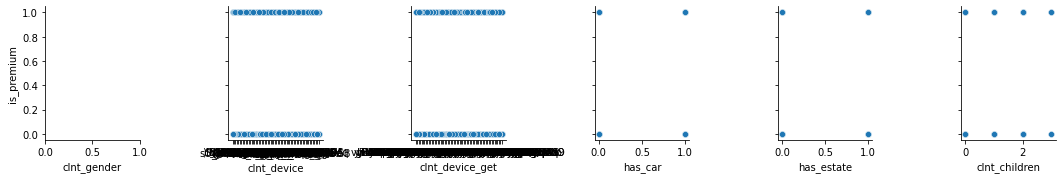

In [52]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[1:7])

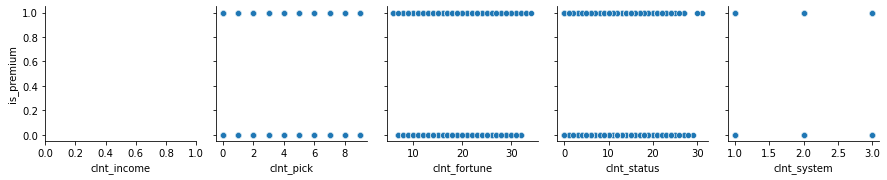

In [53]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[7:12])

Spend_level изучить

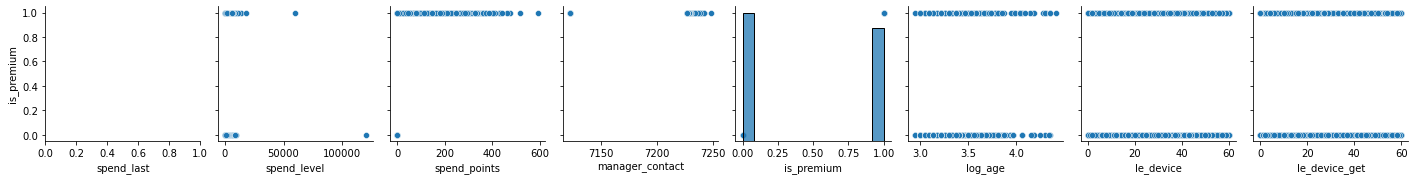

In [54]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[12:])

Если есть менеджер, то точно премиум

In [55]:
crm_data.loc[(crm_data['manager_contact']>7000) & (crm_data['is_premium'] != 1)]

clnt_id  clnt_gender clnt_device       clnt_device_get  has_car  \
1560     2060          1.0  (O@$+)2-Iq  JZ0KLFgkXP3A9WMANoni      0.0   
1663     2278          1.0  ^+3(I8C%&b  DAHGwLtn4JPcATVSWFHk      0.0   
1725     2421          0.0  (O@$+)2-Iq                   NaN      0.0   
1726     2422          0.0  $pffcP&pkj  AEvBGGIi1TYMZpsS5CoK      0.0   
1742     2457          NaN  A&D5V21q5$  xr1OdesOO44Ufzhxxw59      1.0   
1757     2484          0.0  WUn^8@yRRZ  RD8BUJjq4e1qknku300N      1.0   
1764     2500          0.0  fXm+BayjVA  bDs6Xe2iNTT7AkzC2PVT      0.0   
1766     2503          0.0  &UiIgr6b05  DAHGwLtn4JPcATVSWFHk      1.0   
1881     2783          0.0  K*)FJ)edcZ  RKcjWOC0kWGyGsDi325Q      0.0   
1999     3022          0.0  W@&0muZANj  pup1FL83CRpbaMg9C534      0.0   
2023     3067          1.0  &UiIgr6b05  xwVatkCS227il3xATBFE      0.0   
2077     3192          0.0  Bg01S^%Jfy  u6H8Em4pxxagN7S8TAR5      1.0   
2123     3304          0.0  R6B&KN5OOi  TM4ptl78Lwzhng7PAY4G      1.0   
2177     3427          1.0  $pffcP&pkj  TM4ptl78Lwzhng7PAY4G      1.0   
2210     3491          1.0  exk&etBeLF  duj1wNy6PQygCaQYt6ze      1.0   
2213     3495          0.0  ghOfqAzHdO  NW1ON108010azsYbnTXl      1.0   
2308     3702          1.0  tyOjI2@FcB  vtFJx028ksA5j1r4Gevb      1.0   
2316     3713          0.0  Bg01S^%Jfy  noI8N7cvgfYPRswJVqSt      1.0   
2352     3803          0.0  YBjx-RAB9!  duj1wNy6PQygCaQYt6ze      1.0   
2370     3840          1.0  m1o4W&JCvy  lmE6l7DelsqZNYgxcsAZ      0.0   
2381     3860          0.0  y3FVI6dzfi  C55OgTGl37GGqJVFyeYQ      1.0   
2443     4003          1.0  KnasAzg4Vf  AACwntwTHc6JRW83FHAG      1.0   
2520     4172          0.0  Bg01S^%Jfy  apqNDBwDXCytWs6F1c29      NaN   
2543     4225          1.0  Y1+5*e_(9D  0AjfBYGThrZ4OWmX9WCv      0.0   
2552     4250          1.0  N)Eb*EJXD4  RD8BUJjq4e1qknku300N      1.0   
2556     4258          0.0  T+BA%psI8c  AtzkQytHAijh7cklGMUl      0.0   
2567     4278          0.0  cN50%TMttL  i9jqpetwkZDeguJpCWVc      1.0   
2568     4279          0.0  _)nLk%PngJ  RD8BUJjq4e1qknku300N      0.0   
2687     4540          0.0  A&D5V21q5$  AACwntwTHc6JRW83FHAG      1.0   
2701     4576          1.0  fXm+BayjVA  AACwntwTHc6JRW83FHAG      0.0   
2751     4671          0.0  _cbxM0a-Yi  6153L0t8XPPwrqlaHrPc      1.0   
2757     4691          1.0  )!%OA9qpZP  oy7aZVGbnl73VxOs01nQ      0.0   
2800     4787          0.0  _cbxM0a-Yi  EAE3RcxIwQfn3oIbcXZN      1.0   

      has_estate  clnt_children  clnt_income  clnt_pick  clnt_fortune  \
1560         1.0              0       300000          0            11   
1663         0.0              0       200000          0            22   
1725         0.0              0        70000          6            12   
1726         0.0              1       220000          3            13   
1742         1.0              0            0          0            21   
1757         0.0              0       340000          2            21   
1764         0.0              0       340000          7            10   
1766         0.0              0            0          3            13   
1881         0.0              0       110000          0            23   
1999         0.0              1       390000          2            10   
2023         1.0              0       190000          9            19   
2077         NaN              0       340000          2            18   
2123         0.0              0       210000          4            13   
2177         0.0              0       210000          6            19   
2210         0.0              2       260000          7            20   
2213         0.0              1       230000          9            24   
2308         0.0              0        80000          4            15   
2316         NaN              0        10000          9            17   
2352         0.0              0       500000          9            17   
2370         0.0              0       330000          2        

Они все сразу премиум

In [56]:
crm_data.loc[(crm_data['manager_contact']>7000) ,'is_premium']=1

In [57]:
crm_data.drop('manager_contact',axis=1,inplace=True)

spend_level

<AxesSubplot:xlabel='is_premium', ylabel='spend_level'>

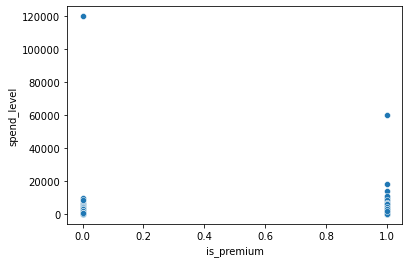

In [58]:
sns.scatterplot(data=crm_data,y='spend_level',x='is_premium')

Думаю что этот "не премиум" с очень большим spend_level, не просто так стал таким, надо будет посмотреть на его транзакции и просто изучить

In [59]:
crm_data.loc[crm_data['spend_level']>80000]

clnt_id  clnt_gender clnt_device       clnt_device_get  has_car  \
1254     3964          0.0  A&D5V21q5$  AACwntwTHc6JRW83FHAG      0.0   

      has_estate  clnt_children  clnt_income  clnt_pick  clnt_fortune  \
1254         1.0              1       190000          3            25   

      clnt_status  clnt_system  spend_last  spend_level  spend_points  \
1254           14            2        1428       120000             0   

      is_premium   log_age  le_device  le_device_get  
1254         0.0  3.258097         14              6

<AxesSubplot:xlabel='is_premium', ylabel='clnt_fortune'>

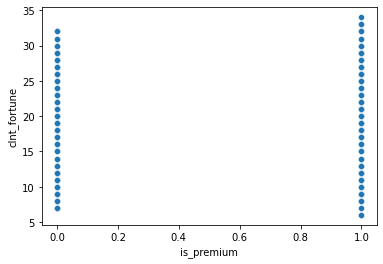

In [60]:
sns.scatterplot(data=crm_data,y='clnt_fortune',x='is_premium')

<AxesSubplot:xlabel='is_premium', ylabel='spend_points'>

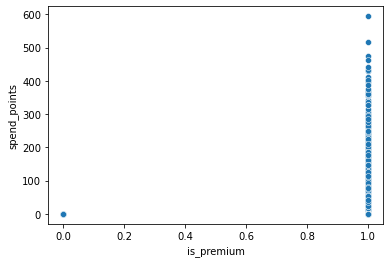

In [61]:
sns.scatterplot(data=crm_data,y='spend_points',x='is_premium')

In [62]:
crm_data.loc[crm_data['spend_points']>0].is_premium.unique()

array([1.])

In [63]:
crm_data.loc[crm_data['spend_points']==0].is_premium.unique()

array([ 1.,  0., nan])

Раз nan только когда =0, то этот столбец не нужен, получается, можно удалить.

In [64]:
crm_data.drop('spend_points',axis=1,inplace=True)

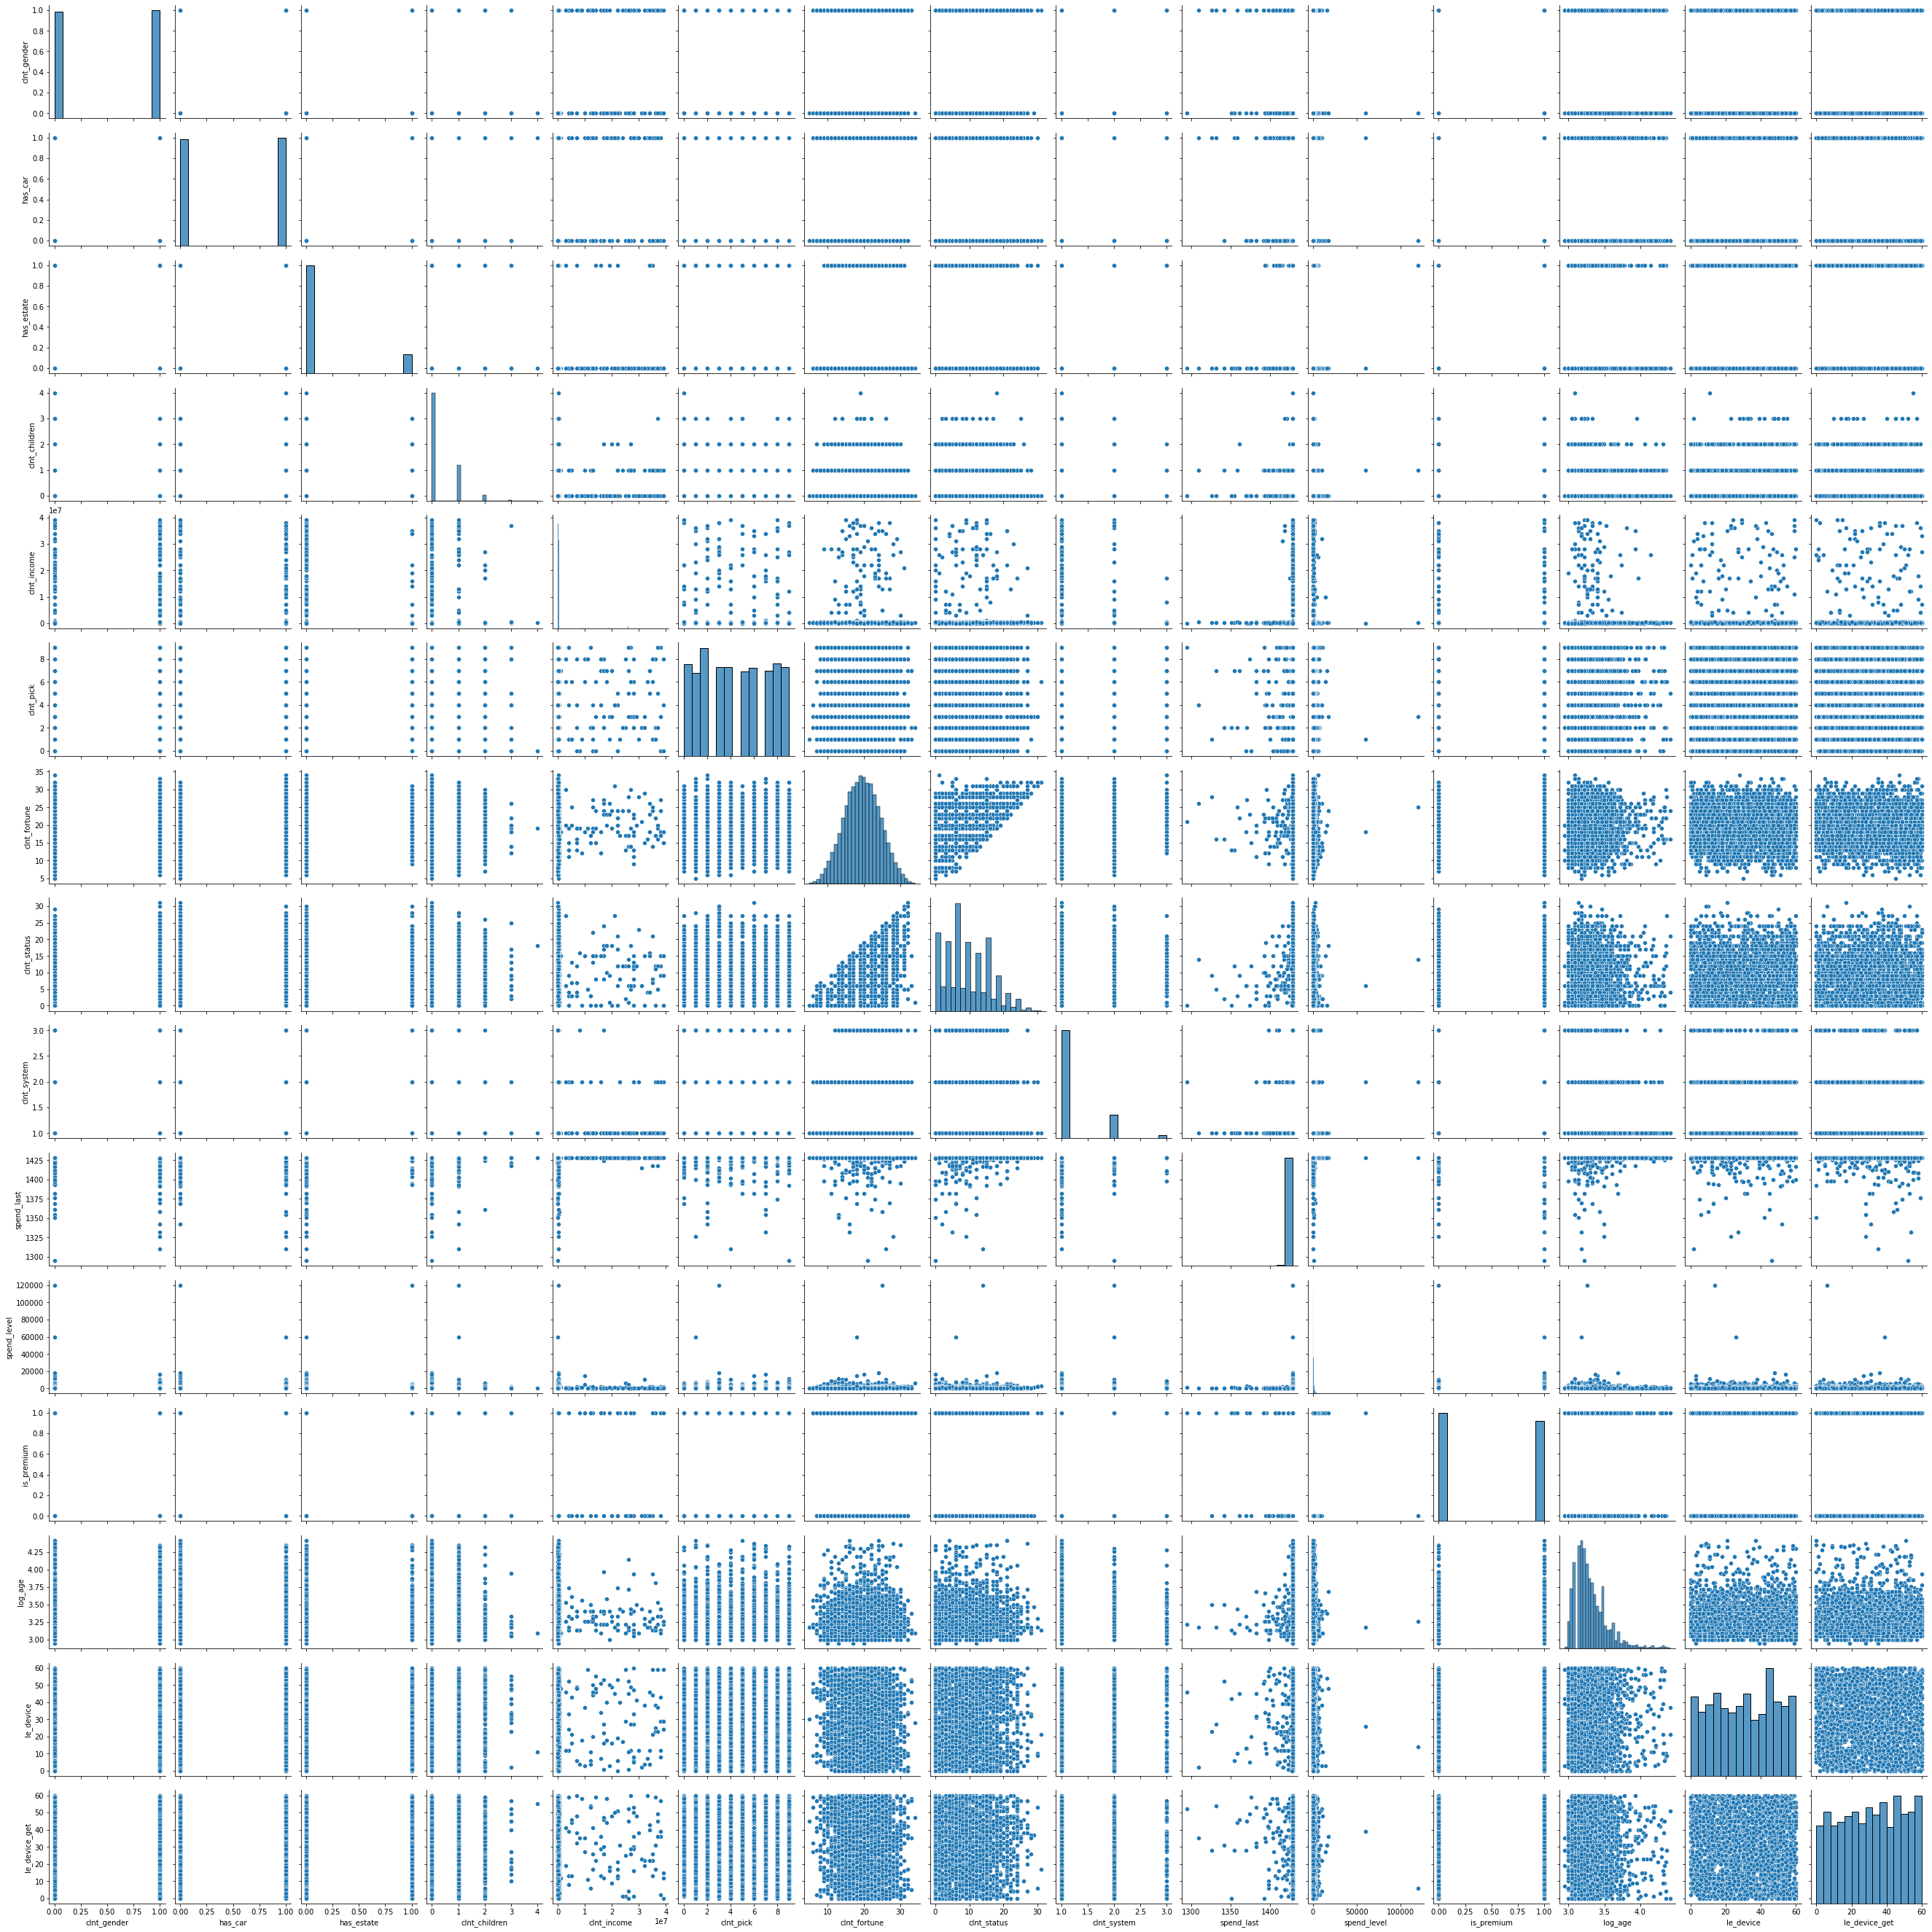

In [65]:
sns.pairplot(crm_data.drop('clnt_id',axis=1))

In [66]:
crm_data.columns

Index(['clnt_id', 'clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level', 'is_premium', 'log_age', 'le_device', 'le_device_get'],
      dtype='object')

<AxesSubplot:xlabel='clnt_gender', ylabel='spend_level'>

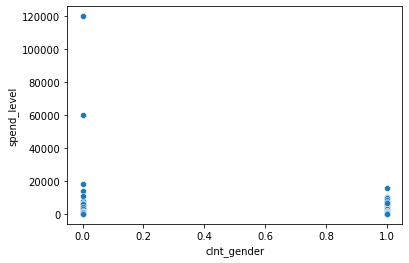

In [67]:
sns.scatterplot(data=crm_data,x='clnt_gender',y='spend_level')

Два выброса одного пола, окей

In [68]:
from category_encoders import *

In [69]:
crm_data.drop(['le_device', 'le_device_get'],axis=1,inplace=True)
train=crm_data.query('is_premium==1 or is_premium==0')
test=crm_data.drop(train.index)
test.drop(['is_premium','clnt_id'],axis=1,inplace=True)
y=train.is_premium
x=train.drop(['clnt_id','is_premium'],axis=1)

In [70]:
x.columns

Index(['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level', 'log_age'],
      dtype='object')

In [71]:
for i in crm_data.columns:
    print(i,end=' ')
    if crm_data[i].dtype!='object':
        print(np.sort(crm_data[i].unique()))
    else:
        print(crm_data[i].unique())

clnt_id [2000 2001 2002 ... 4997 4998 4999]
clnt_gender [ 0.  1. nan]
clnt_device ['sO@*%lun08' ')!%OA9qpZP' 'IgSHlRCsd#' 'SSbZb5Hpun' 'N)Eb*EJXD4'
 '_)nLk%PngJ' 'vJ#XVpcNy6' 'pi&NYvrpiu' 'NMZa(_ZevK' 'tZet+bbIC_'
 'T+BA%psI8c' 'ghOfqAzHdO' '+qOE#oK7Bu' 'm1o4W&JCvy' nan 'Y1+5*e_(9D'
 'rcJgTotoi8' 'KnasAzg4Vf' 'tyOjI2@FcB' 'A&D5V21q5$' '$pffcP&pkj'
 '^+3(I8C%&b' 'Nljw_d_PZV' 'rreI!9jkPq' 'WUn^8@yRRZ' 'm4Onx$jC_+'
 '+d)U@Ozdq@' 'R6B&KN5OOi' 'K*)FJ)edcZ' '&qrVc7H^jE' '4(*Kax8&YS'
 '@bM12Da%6&' 'cN50%TMttL' '4!5PbGR!VN' 'W@&0muZANj' '6J4&mF&#tl'
 'UaSer)d$CZ' 'y3FVI6dzfi' 'gTkSzDk+OA' 'yJrFzC0McE' 'nR4%tYIRXv'
 'AWrJqks-tw' '!Zusbz4GJ@' 'sUse$3S4Z%' '4aQwCtPL4(' 'H#s_lw9F_R'
 'exk&etBeLF' 'Bg01S^%Jfy' 'jso!fQ*Q7x' 'py_Z4O$Gg+' '_cbxM0a-Yi'
 '-(Tu#R_@lh' 'zzhjn9-Ew-' 'xAZj4fx97F' 'vB5-)b$ZR+' '_)nAgN9)Gz'
 'fXm+BayjVA' 'YBjx-RAB9!' '&UiIgr6b05' 'C_QpEX%9CB' '(O@$+)2-Iq']
clnt_device_get ['vgIXi0LgoZHQ71Mmekm1' 'lmE6l7DelsqZNYgxcsAZ' 'yhUtC1GSVpWWNPCI9EYo'
 'TM4ptl78Lwzhng7PAY4G' 'EAE3RcxIwQ

Получается, что не категор только clnt_income, log_age

In [72]:

enc = TargetEncoder(cols=['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level'])

# transform the datasets
te_x = enc.fit_transform(x, y)
te_test = enc.transform(test)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scaleColumns(df1,df2):
    for col in df1.columns:
        df1[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
        df2[col]=pd.DataFrame(scaler.transform(pd.DataFrame(df2[col])),columns=[col])
    return df1,df2
te_t_x,te_t_test=scaleColumns(te_x,te_test)

In [74]:
from xgboost import XGBClassifier

In [75]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=3000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
te_t_x, y, test_size=0.2, stratify=y)

In [77]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[11:18:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.39092	validation_1-error:0.46984
[1]	validation_0-error:0.34475	validation_1-error:0.45079
[2]	validation_0-error:0.34315	validation_1-error:0.42540
[3]	validation_0-error:0.30971	validation_1-error:0.37778
[4]	validation_0-error:0.30892	validation_1-error:0.39365
[5]	validation_0-error:0.30414	validation_1-error:0.40635
[6]	validation_0-error:0.28424	validation_1-error:0.40952
[7]	validation_0-error:0.29299	validation_1-error:0.40952
[8]	validation_0-error:0.29220	validation_1-error:0.40318
[9]	validation_0-error:0.26433	validation_1-error:0.38730
[10]	validation_0-error:0.26433	vali

[132]	validation_0-error:0.18073	validation_1-error:0.29841
[133]	validation_0-error:0.17994	validation_1-error:0.29841
[134]	validation_0-error:0.18153	validation_1-error:0.29841
[135]	validation_0-error:0.17914	validation_1-error:0.30159
[136]	validation_0-error:0.17596	validation_1-error:0.30159
[137]	validation_0-error:0.17516	validation_1-error:0.30476
[138]	validation_0-error:0.17596	validation_1-error:0.30159
[139]	validation_0-error:0.17516	validation_1-error:0.30159
[140]	validation_0-error:0.17357	validation_1-error:0.30159
[141]	validation_0-error:0.17118	validation_1-error:0.30159
[142]	validation_0-error:0.17197	validation_1-error:0.30159
[143]	validation_0-error:0.17197	validation_1-error:0.30159
[144]	validation_0-error:0.17197	validation_1-error:0.30476
[145]	validation_0-error:0.17038	validation_1-error:0.30476
[146]	validation_0-error:0.17118	validation_1-error:0.30794
[147]	validation_0-error:0.17038	validation_1-error:0.30794
[148]	validation_0-error:0.16959	validat

[269]	validation_0-error:0.12261	validation_1-error:0.31111
[270]	validation_0-error:0.12102	validation_1-error:0.31111
[271]	validation_0-error:0.11943	validation_1-error:0.31111
[272]	validation_0-error:0.11863	validation_1-error:0.31111
[273]	validation_0-error:0.12022	validation_1-error:0.31111
[274]	validation_0-error:0.11943	validation_1-error:0.31429
[275]	validation_0-error:0.12022	validation_1-error:0.31111
[276]	validation_0-error:0.11943	validation_1-error:0.31111
[277]	validation_0-error:0.11863	validation_1-error:0.31111
[278]	validation_0-error:0.11863	validation_1-error:0.31429
[279]	validation_0-error:0.11783	validation_1-error:0.31111
[280]	validation_0-error:0.11863	validation_1-error:0.31111
[281]	validation_0-error:0.11624	validation_1-error:0.31111
[282]	validation_0-error:0.11624	validation_1-error:0.31111
[283]	validation_0-error:0.11624	validation_1-error:0.31429
[284]	validation_0-error:0.11545	validation_1-error:0.31429
[285]	validation_0-error:0.11385	validat

[406]	validation_0-error:0.07245	validation_1-error:0.33651
[407]	validation_0-error:0.07166	validation_1-error:0.33651
[408]	validation_0-error:0.07166	validation_1-error:0.33651
[409]	validation_0-error:0.07086	validation_1-error:0.33651
[410]	validation_0-error:0.07245	validation_1-error:0.33651
[411]	validation_0-error:0.07245	validation_1-error:0.33333
[412]	validation_0-error:0.07166	validation_1-error:0.33016
[413]	validation_0-error:0.07166	validation_1-error:0.32381
[414]	validation_0-error:0.07006	validation_1-error:0.32698
[415]	validation_0-error:0.06927	validation_1-error:0.32698
[416]	validation_0-error:0.06847	validation_1-error:0.32698
[417]	validation_0-error:0.06847	validation_1-error:0.32381
[418]	validation_0-error:0.06688	validation_1-error:0.33333
[419]	validation_0-error:0.06767	validation_1-error:0.33016
[420]	validation_0-error:0.06767	validation_1-error:0.33016
[421]	validation_0-error:0.06608	validation_1-error:0.33016
[422]	validation_0-error:0.06608	validat

[543]	validation_0-error:0.04936	validation_1-error:0.33016
[544]	validation_0-error:0.05016	validation_1-error:0.32698
[545]	validation_0-error:0.04936	validation_1-error:0.33016
[546]	validation_0-error:0.04857	validation_1-error:0.33016
[547]	validation_0-error:0.04936	validation_1-error:0.33016
[548]	validation_0-error:0.04936	validation_1-error:0.32698
[549]	validation_0-error:0.04936	validation_1-error:0.32698
[550]	validation_0-error:0.04936	validation_1-error:0.32698
[551]	validation_0-error:0.05016	validation_1-error:0.32698
[552]	validation_0-error:0.05016	validation_1-error:0.32698
[553]	validation_0-error:0.05016	validation_1-error:0.32698
[554]	validation_0-error:0.04857	validation_1-error:0.32698
[555]	validation_0-error:0.04698	validation_1-error:0.32698
[556]	validation_0-error:0.04777	validation_1-error:0.33651
[557]	validation_0-error:0.04936	validation_1-error:0.33651
[558]	validation_0-error:0.04777	validation_1-error:0.33651
[559]	validation_0-error:0.04857	validat

[680]	validation_0-error:0.04220	validation_1-error:0.33016
[681]	validation_0-error:0.04220	validation_1-error:0.33016
[682]	validation_0-error:0.04140	validation_1-error:0.33016
[683]	validation_0-error:0.04140	validation_1-error:0.33016
[684]	validation_0-error:0.04220	validation_1-error:0.33016
[685]	validation_0-error:0.04299	validation_1-error:0.33651
[686]	validation_0-error:0.04220	validation_1-error:0.33333
[687]	validation_0-error:0.04220	validation_1-error:0.33333
[688]	validation_0-error:0.04220	validation_1-error:0.33016
[689]	validation_0-error:0.04220	validation_1-error:0.32698
[690]	validation_0-error:0.04220	validation_1-error:0.32698
[691]	validation_0-error:0.04220	validation_1-error:0.32698
[692]	validation_0-error:0.04140	validation_1-error:0.32698
[693]	validation_0-error:0.04140	validation_1-error:0.32698
[694]	validation_0-error:0.03981	validation_1-error:0.32698
[695]	validation_0-error:0.03981	validation_1-error:0.33016
[696]	validation_0-error:0.03981	validat

[817]	validation_0-error:0.03503	validation_1-error:0.32381
[818]	validation_0-error:0.03503	validation_1-error:0.32381
[819]	validation_0-error:0.03583	validation_1-error:0.32381
[820]	validation_0-error:0.03583	validation_1-error:0.32698
[821]	validation_0-error:0.03583	validation_1-error:0.32698
[822]	validation_0-error:0.03503	validation_1-error:0.32698
[823]	validation_0-error:0.03503	validation_1-error:0.33016
[824]	validation_0-error:0.03503	validation_1-error:0.33016
[825]	validation_0-error:0.03503	validation_1-error:0.33016
[826]	validation_0-error:0.03503	validation_1-error:0.33016
[827]	validation_0-error:0.03503	validation_1-error:0.33016
[828]	validation_0-error:0.03503	validation_1-error:0.33016
[829]	validation_0-error:0.03503	validation_1-error:0.32698
[830]	validation_0-error:0.03503	validation_1-error:0.32698
[831]	validation_0-error:0.03503	validation_1-error:0.33016
[832]	validation_0-error:0.03503	validation_1-error:0.33016
[833]	validation_0-error:0.03424	validat

[954]	validation_0-error:0.03026	validation_1-error:0.32698
[955]	validation_0-error:0.03026	validation_1-error:0.32698
[956]	validation_0-error:0.03026	validation_1-error:0.32698
[957]	validation_0-error:0.03026	validation_1-error:0.32698
[958]	validation_0-error:0.03026	validation_1-error:0.32698
[959]	validation_0-error:0.03026	validation_1-error:0.33016
[960]	validation_0-error:0.03026	validation_1-error:0.32698
[961]	validation_0-error:0.03026	validation_1-error:0.32698
[962]	validation_0-error:0.02866	validation_1-error:0.33016
[963]	validation_0-error:0.02866	validation_1-error:0.33016
[964]	validation_0-error:0.02946	validation_1-error:0.33016
[965]	validation_0-error:0.02946	validation_1-error:0.33016
[966]	validation_0-error:0.02946	validation_1-error:0.33016
[967]	validation_0-error:0.02866	validation_1-error:0.33016
[968]	validation_0-error:0.02946	validation_1-error:0.33016
[969]	validation_0-error:0.02866	validation_1-error:0.33016
[970]	validation_0-error:0.02946	validat

[1090]	validation_0-error:0.01990	validation_1-error:0.33968
[1091]	validation_0-error:0.01990	validation_1-error:0.33968
[1092]	validation_0-error:0.01990	validation_1-error:0.33651
[1093]	validation_0-error:0.01990	validation_1-error:0.33651
[1094]	validation_0-error:0.01990	validation_1-error:0.33651
[1095]	validation_0-error:0.01990	validation_1-error:0.33651
[1096]	validation_0-error:0.01990	validation_1-error:0.33651
[1097]	validation_0-error:0.01990	validation_1-error:0.33651
[1098]	validation_0-error:0.02070	validation_1-error:0.33651
[1099]	validation_0-error:0.02070	validation_1-error:0.33651
[1100]	validation_0-error:0.02070	validation_1-error:0.33651
[1101]	validation_0-error:0.02070	validation_1-error:0.33651
[1102]	validation_0-error:0.02070	validation_1-error:0.33968
[1103]	validation_0-error:0.02070	validation_1-error:0.33651
[1104]	validation_0-error:0.01990	validation_1-error:0.33651
[1105]	validation_0-error:0.01911	validation_1-error:0.33651
[1106]	validation_0-erro

[1225]	validation_0-error:0.01752	validation_1-error:0.33333
[1226]	validation_0-error:0.01752	validation_1-error:0.33333
[1227]	validation_0-error:0.01752	validation_1-error:0.33333
[1228]	validation_0-error:0.01752	validation_1-error:0.33333
[1229]	validation_0-error:0.01752	validation_1-error:0.33333
[1230]	validation_0-error:0.01752	validation_1-error:0.33333
[1231]	validation_0-error:0.01752	validation_1-error:0.33333
[1232]	validation_0-error:0.01752	validation_1-error:0.33333
[1233]	validation_0-error:0.01752	validation_1-error:0.33333
[1234]	validation_0-error:0.01752	validation_1-error:0.33333
[1235]	validation_0-error:0.01752	validation_1-error:0.33333
[1236]	validation_0-error:0.01752	validation_1-error:0.33333
[1237]	validation_0-error:0.01831	validation_1-error:0.33333
[1238]	validation_0-error:0.01752	validation_1-error:0.33333
[1239]	validation_0-error:0.01752	validation_1-error:0.33333
[1240]	validation_0-error:0.01831	validation_1-error:0.33333
[1241]	validation_0-erro

[1360]	validation_0-error:0.01831	validation_1-error:0.33651
[1361]	validation_0-error:0.01831	validation_1-error:0.33651
[1362]	validation_0-error:0.01831	validation_1-error:0.33333
[1363]	validation_0-error:0.01831	validation_1-error:0.33016
[1364]	validation_0-error:0.01831	validation_1-error:0.33016
[1365]	validation_0-error:0.01831	validation_1-error:0.33333
[1366]	validation_0-error:0.01831	validation_1-error:0.33333
[1367]	validation_0-error:0.01831	validation_1-error:0.33333
[1368]	validation_0-error:0.01831	validation_1-error:0.33333
[1369]	validation_0-error:0.01831	validation_1-error:0.33333
[1370]	validation_0-error:0.01831	validation_1-error:0.33333
[1371]	validation_0-error:0.01831	validation_1-error:0.33333
[1372]	validation_0-error:0.01831	validation_1-error:0.33333
[1373]	validation_0-error:0.01831	validation_1-error:0.33333
[1374]	validation_0-error:0.01831	validation_1-error:0.33333
[1375]	validation_0-error:0.01831	validation_1-error:0.33333
[1376]	validation_0-erro

[1495]	validation_0-error:0.01672	validation_1-error:0.33651
[1496]	validation_0-error:0.01672	validation_1-error:0.33651
[1497]	validation_0-error:0.01672	validation_1-error:0.33333
[1498]	validation_0-error:0.01672	validation_1-error:0.33333
[1499]	validation_0-error:0.01672	validation_1-error:0.33333
[1500]	validation_0-error:0.01672	validation_1-error:0.33333
[1501]	validation_0-error:0.01672	validation_1-error:0.33333
[1502]	validation_0-error:0.01592	validation_1-error:0.33333
[1503]	validation_0-error:0.01592	validation_1-error:0.33333
[1504]	validation_0-error:0.01592	validation_1-error:0.33651
[1505]	validation_0-error:0.01592	validation_1-error:0.33651
[1506]	validation_0-error:0.01592	validation_1-error:0.33651
[1507]	validation_0-error:0.01592	validation_1-error:0.33651
[1508]	validation_0-error:0.01592	validation_1-error:0.33651
[1509]	validation_0-error:0.01592	validation_1-error:0.33651
[1510]	validation_0-error:0.01592	validation_1-error:0.33968
[1511]	validation_0-erro

[1630]	validation_0-error:0.01592	validation_1-error:0.33333
[1631]	validation_0-error:0.01592	validation_1-error:0.33016
[1632]	validation_0-error:0.01592	validation_1-error:0.33333
[1633]	validation_0-error:0.01592	validation_1-error:0.33333
[1634]	validation_0-error:0.01592	validation_1-error:0.33333
[1635]	validation_0-error:0.01513	validation_1-error:0.33333
[1636]	validation_0-error:0.01592	validation_1-error:0.33333
[1637]	validation_0-error:0.01592	validation_1-error:0.33333
[1638]	validation_0-error:0.01592	validation_1-error:0.33333
[1639]	validation_0-error:0.01513	validation_1-error:0.33333
[1640]	validation_0-error:0.01513	validation_1-error:0.33333
[1641]	validation_0-error:0.01513	validation_1-error:0.33333
[1642]	validation_0-error:0.01513	validation_1-error:0.33333
[1643]	validation_0-error:0.01513	validation_1-error:0.33333
[1644]	validation_0-error:0.01513	validation_1-error:0.33016
[1645]	validation_0-error:0.01513	validation_1-error:0.33016
[1646]	validation_0-erro

[1765]	validation_0-error:0.01433	validation_1-error:0.33333
[1766]	validation_0-error:0.01433	validation_1-error:0.33333
[1767]	validation_0-error:0.01433	validation_1-error:0.33333
[1768]	validation_0-error:0.01433	validation_1-error:0.33333
[1769]	validation_0-error:0.01433	validation_1-error:0.33333
[1770]	validation_0-error:0.01433	validation_1-error:0.33333
[1771]	validation_0-error:0.01433	validation_1-error:0.33333
[1772]	validation_0-error:0.01433	validation_1-error:0.33333
[1773]	validation_0-error:0.01354	validation_1-error:0.33333
[1774]	validation_0-error:0.01354	validation_1-error:0.33333
[1775]	validation_0-error:0.01354	validation_1-error:0.33333
[1776]	validation_0-error:0.01354	validation_1-error:0.33333
[1777]	validation_0-error:0.01354	validation_1-error:0.33333
[1778]	validation_0-error:0.01354	validation_1-error:0.33333
[1779]	validation_0-error:0.01354	validation_1-error:0.33333
[1780]	validation_0-error:0.01354	validation_1-error:0.33333
[1781]	validation_0-erro

[1900]	validation_0-error:0.01354	validation_1-error:0.33651
[1901]	validation_0-error:0.01354	validation_1-error:0.33651
[1902]	validation_0-error:0.01274	validation_1-error:0.33651
[1903]	validation_0-error:0.01274	validation_1-error:0.33651
[1904]	validation_0-error:0.01274	validation_1-error:0.33651
[1905]	validation_0-error:0.01274	validation_1-error:0.33651
[1906]	validation_0-error:0.01274	validation_1-error:0.33651
[1907]	validation_0-error:0.01194	validation_1-error:0.33651
[1908]	validation_0-error:0.01354	validation_1-error:0.33651
[1909]	validation_0-error:0.01274	validation_1-error:0.33651
[1910]	validation_0-error:0.01274	validation_1-error:0.33651
[1911]	validation_0-error:0.01274	validation_1-error:0.33651
[1912]	validation_0-error:0.01274	validation_1-error:0.33651
[1913]	validation_0-error:0.01274	validation_1-error:0.33968
[1914]	validation_0-error:0.01274	validation_1-error:0.33968
[1915]	validation_0-error:0.01274	validation_1-error:0.33651
[1916]	validation_0-erro

[2035]	validation_0-error:0.01194	validation_1-error:0.33968
[2036]	validation_0-error:0.01194	validation_1-error:0.33968
[2037]	validation_0-error:0.01194	validation_1-error:0.33651
[2038]	validation_0-error:0.01115	validation_1-error:0.33651
[2039]	validation_0-error:0.01354	validation_1-error:0.33651
[2040]	validation_0-error:0.01274	validation_1-error:0.33968
[2041]	validation_0-error:0.01274	validation_1-error:0.33968
[2042]	validation_0-error:0.01274	validation_1-error:0.33968
[2043]	validation_0-error:0.01194	validation_1-error:0.33968
[2044]	validation_0-error:0.01194	validation_1-error:0.33968
[2045]	validation_0-error:0.01194	validation_1-error:0.33968
[2046]	validation_0-error:0.01274	validation_1-error:0.33968
[2047]	validation_0-error:0.01115	validation_1-error:0.33968
[2048]	validation_0-error:0.01115	validation_1-error:0.33968
[2049]	validation_0-error:0.01115	validation_1-error:0.33968
[2050]	validation_0-error:0.01115	validation_1-error:0.33968
[2051]	validation_0-erro

[2170]	validation_0-error:0.01035	validation_1-error:0.33968
[2171]	validation_0-error:0.01035	validation_1-error:0.33968
[2172]	validation_0-error:0.01035	validation_1-error:0.33968
[2173]	validation_0-error:0.01035	validation_1-error:0.33968
[2174]	validation_0-error:0.01035	validation_1-error:0.33968
[2175]	validation_0-error:0.00955	validation_1-error:0.33968
[2176]	validation_0-error:0.00955	validation_1-error:0.33968
[2177]	validation_0-error:0.00955	validation_1-error:0.33968
[2178]	validation_0-error:0.00955	validation_1-error:0.33968
[2179]	validation_0-error:0.00955	validation_1-error:0.33968
[2180]	validation_0-error:0.00955	validation_1-error:0.33968
[2181]	validation_0-error:0.00955	validation_1-error:0.33968
[2182]	validation_0-error:0.00955	validation_1-error:0.33968
[2183]	validation_0-error:0.00955	validation_1-error:0.33968
[2184]	validation_0-error:0.00955	validation_1-error:0.33968
[2185]	validation_0-error:0.00955	validation_1-error:0.33968
[2186]	validation_0-erro

[2305]	validation_0-error:0.00876	validation_1-error:0.33968
[2306]	validation_0-error:0.00876	validation_1-error:0.33968
[2307]	validation_0-error:0.00876	validation_1-error:0.33968
[2308]	validation_0-error:0.00876	validation_1-error:0.33968
[2309]	validation_0-error:0.00876	validation_1-error:0.33968
[2310]	validation_0-error:0.00876	validation_1-error:0.33968
[2311]	validation_0-error:0.00876	validation_1-error:0.33968
[2312]	validation_0-error:0.00876	validation_1-error:0.33968
[2313]	validation_0-error:0.00955	validation_1-error:0.33968
[2314]	validation_0-error:0.00876	validation_1-error:0.33968
[2315]	validation_0-error:0.00876	validation_1-error:0.33968
[2316]	validation_0-error:0.00876	validation_1-error:0.33968
[2317]	validation_0-error:0.00876	validation_1-error:0.33968
[2318]	validation_0-error:0.00876	validation_1-error:0.33968
[2319]	validation_0-error:0.00876	validation_1-error:0.33968
[2320]	validation_0-error:0.00876	validation_1-error:0.33968
[2321]	validation_0-erro

[2440]	validation_0-error:0.00876	validation_1-error:0.33968
[2441]	validation_0-error:0.00876	validation_1-error:0.33968
[2442]	validation_0-error:0.00876	validation_1-error:0.33651
[2443]	validation_0-error:0.00876	validation_1-error:0.33651
[2444]	validation_0-error:0.00876	validation_1-error:0.33651
[2445]	validation_0-error:0.00876	validation_1-error:0.33651
[2446]	validation_0-error:0.00876	validation_1-error:0.33651
[2447]	validation_0-error:0.00876	validation_1-error:0.33651
[2448]	validation_0-error:0.00876	validation_1-error:0.33651
[2449]	validation_0-error:0.00876	validation_1-error:0.33651
[2450]	validation_0-error:0.00876	validation_1-error:0.33651
[2451]	validation_0-error:0.00876	validation_1-error:0.33651
[2452]	validation_0-error:0.00876	validation_1-error:0.33651
[2453]	validation_0-error:0.00876	validation_1-error:0.33651
[2454]	validation_0-error:0.00876	validation_1-error:0.33968
[2455]	validation_0-error:0.00876	validation_1-error:0.33968
[2456]	validation_0-erro

[2575]	validation_0-error:0.00717	validation_1-error:0.33968
[2576]	validation_0-error:0.00717	validation_1-error:0.33968
[2577]	validation_0-error:0.00717	validation_1-error:0.33968
[2578]	validation_0-error:0.00717	validation_1-error:0.33968
[2579]	validation_0-error:0.00717	validation_1-error:0.33968
[2580]	validation_0-error:0.00717	validation_1-error:0.33968
[2581]	validation_0-error:0.00796	validation_1-error:0.33968
[2582]	validation_0-error:0.00717	validation_1-error:0.33968
[2583]	validation_0-error:0.00796	validation_1-error:0.33968
[2584]	validation_0-error:0.00796	validation_1-error:0.33968
[2585]	validation_0-error:0.00796	validation_1-error:0.33968
[2586]	validation_0-error:0.00796	validation_1-error:0.33968
[2587]	validation_0-error:0.00796	validation_1-error:0.33968
[2588]	validation_0-error:0.00796	validation_1-error:0.33968
[2589]	validation_0-error:0.00796	validation_1-error:0.33968
[2590]	validation_0-error:0.00796	validation_1-error:0.33968
[2591]	validation_0-erro

[2710]	validation_0-error:0.00717	validation_1-error:0.33333
[2711]	validation_0-error:0.00717	validation_1-error:0.33333
[2712]	validation_0-error:0.00717	validation_1-error:0.33333
[2713]	validation_0-error:0.00717	validation_1-error:0.33333
[2714]	validation_0-error:0.00717	validation_1-error:0.33333
[2715]	validation_0-error:0.00717	validation_1-error:0.33333
[2716]	validation_0-error:0.00717	validation_1-error:0.33333
[2717]	validation_0-error:0.00796	validation_1-error:0.33333
[2718]	validation_0-error:0.00796	validation_1-error:0.33333
[2719]	validation_0-error:0.00796	validation_1-error:0.33333
[2720]	validation_0-error:0.00796	validation_1-error:0.33333
[2721]	validation_0-error:0.00796	validation_1-error:0.33333
[2722]	validation_0-error:0.00796	validation_1-error:0.33333
[2723]	validation_0-error:0.00796	validation_1-error:0.33333
[2724]	validation_0-error:0.00717	validation_1-error:0.33333
[2725]	validation_0-error:0.00796	validation_1-error:0.33333
[2726]	validation_0-erro

[2845]	validation_0-error:0.00796	validation_1-error:0.33651
[2846]	validation_0-error:0.00796	validation_1-error:0.33651
[2847]	validation_0-error:0.00796	validation_1-error:0.33651
[2848]	validation_0-error:0.00796	validation_1-error:0.33651
[2849]	validation_0-error:0.00796	validation_1-error:0.33651
[2850]	validation_0-error:0.00796	validation_1-error:0.33651
[2851]	validation_0-error:0.00796	validation_1-error:0.33651
[2852]	validation_0-error:0.00796	validation_1-error:0.33651
[2853]	validation_0-error:0.00796	validation_1-error:0.33651
[2854]	validation_0-error:0.00796	validation_1-error:0.33651
[2855]	validation_0-error:0.00796	validation_1-error:0.33651
[2856]	validation_0-error:0.00796	validation_1-error:0.33651
[2857]	validation_0-error:0.00796	validation_1-error:0.33651
[2858]	validation_0-error:0.00796	validation_1-error:0.33651
[2859]	validation_0-error:0.00796	validation_1-error:0.33651
[2860]	validation_0-error:0.00796	validation_1-error:0.33651
[2861]	validation_0-erro

[2980]	validation_0-error:0.00717	validation_1-error:0.33651
[2981]	validation_0-error:0.00717	validation_1-error:0.33651
[2982]	validation_0-error:0.00717	validation_1-error:0.33651
[2983]	validation_0-error:0.00717	validation_1-error:0.33651
[2984]	validation_0-error:0.00717	validation_1-error:0.33651
[2985]	validation_0-error:0.00717	validation_1-error:0.33651
[2986]	validation_0-error:0.00717	validation_1-error:0.33651
[2987]	validation_0-error:0.00717	validation_1-error:0.33651
[2988]	validation_0-error:0.00717	validation_1-error:0.33651
[2989]	validation_0-error:0.00717	validation_1-error:0.33651
[2990]	validation_0-error:0.00717	validation_1-error:0.33651
[2991]	validation_0-error:0.00717	validation_1-error:0.33651
[2992]	validation_0-error:0.00717	validation_1-error:0.33651
[2993]	validation_0-error:0.00717	validation_1-error:0.33651
[2994]	validation_0-error:0.00717	validation_1-error:0.33651
[2995]	validation_0-error:0.00717	validation_1-error:0.33651
[2996]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

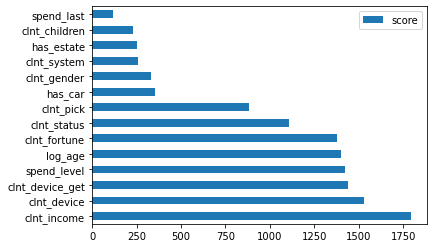

In [78]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

видны самые влиятельные на основе таргет энкода

In [79]:
encc = CatBoostEncoder(cols=['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level'])

# transform the datasets
encc.fit(x,y)
tec_x = encc.transform(x)
tec_test = encc.transform(test)
tec_t_x,tec_t_test=scaleColumns(tec_x,tec_test)
modelc = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=3000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
X_train, X_test, y_train, y_test = train_test_split(
tec_t_x, y, test_size=0.2, stratify=y)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time modelc.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[11:18:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.39570	validation_1-error:0.46984
[1]	validation_0-error:0.34315	validation_1-error:0.39048
[2]	validation_0-error:0.33758	validation_1-error:0.40318
[3]	validation_0-error:0.29459	validation_1-error:0.34921
[4]	validation_0-error:0.30016	validation_1-error:0.35238
[5]	validation_0-error:0.29857	validation_1-error:0.37143
[6]	validation_0-error:0.27787	validation_1-error:0.38413
[7]	validation_0-error:0.28662	validation_1-error:0.37778
[8]	validation_0-error:0.28264	validation_1-error:0.38095
[9]	validation_0-error:0.26274	validation_1-error:0.35556
[10]	validation_0-error:0.25557	vali

[132]	validation_0-error:0.16799	validation_1-error:0.29524
[133]	validation_0-error:0.16720	validation_1-error:0.29206
[134]	validation_0-error:0.16799	validation_1-error:0.28889
[135]	validation_0-error:0.16561	validation_1-error:0.28889
[136]	validation_0-error:0.16561	validation_1-error:0.28889
[137]	validation_0-error:0.16481	validation_1-error:0.27936
[138]	validation_0-error:0.16481	validation_1-error:0.28254
[139]	validation_0-error:0.16401	validation_1-error:0.29206
[140]	validation_0-error:0.16322	validation_1-error:0.29841
[141]	validation_0-error:0.16242	validation_1-error:0.29206
[142]	validation_0-error:0.16481	validation_1-error:0.28889
[143]	validation_0-error:0.16401	validation_1-error:0.28254
[144]	validation_0-error:0.16162	validation_1-error:0.28254
[145]	validation_0-error:0.16083	validation_1-error:0.28254
[146]	validation_0-error:0.16083	validation_1-error:0.28571
[147]	validation_0-error:0.16083	validation_1-error:0.28571
[148]	validation_0-error:0.15924	validat

[269]	validation_0-error:0.11704	validation_1-error:0.31746
[270]	validation_0-error:0.11704	validation_1-error:0.31746
[271]	validation_0-error:0.11624	validation_1-error:0.31746
[272]	validation_0-error:0.11545	validation_1-error:0.31746
[273]	validation_0-error:0.11465	validation_1-error:0.31746
[274]	validation_0-error:0.11465	validation_1-error:0.31746
[275]	validation_0-error:0.11385	validation_1-error:0.31746
[276]	validation_0-error:0.11545	validation_1-error:0.31746
[277]	validation_0-error:0.11545	validation_1-error:0.31746
[278]	validation_0-error:0.11624	validation_1-error:0.31746
[279]	validation_0-error:0.11624	validation_1-error:0.31746
[280]	validation_0-error:0.11465	validation_1-error:0.32064
[281]	validation_0-error:0.11465	validation_1-error:0.32064
[282]	validation_0-error:0.11385	validation_1-error:0.32064
[283]	validation_0-error:0.11226	validation_1-error:0.32064
[284]	validation_0-error:0.11306	validation_1-error:0.31746
[285]	validation_0-error:0.11067	validat

[406]	validation_0-error:0.08360	validation_1-error:0.32381
[407]	validation_0-error:0.08360	validation_1-error:0.32381
[408]	validation_0-error:0.08360	validation_1-error:0.32698
[409]	validation_0-error:0.08360	validation_1-error:0.32381
[410]	validation_0-error:0.08360	validation_1-error:0.32698
[411]	validation_0-error:0.08121	validation_1-error:0.32381
[412]	validation_0-error:0.08041	validation_1-error:0.33016
[413]	validation_0-error:0.07962	validation_1-error:0.33016
[414]	validation_0-error:0.08041	validation_1-error:0.33016
[415]	validation_0-error:0.08121	validation_1-error:0.33016
[416]	validation_0-error:0.08041	validation_1-error:0.33016
[417]	validation_0-error:0.08041	validation_1-error:0.33016
[418]	validation_0-error:0.08041	validation_1-error:0.32698
[419]	validation_0-error:0.08041	validation_1-error:0.32381
[420]	validation_0-error:0.08041	validation_1-error:0.32381
[421]	validation_0-error:0.07962	validation_1-error:0.32381
[422]	validation_0-error:0.07882	validat

[543]	validation_0-error:0.05892	validation_1-error:0.33651
[544]	validation_0-error:0.05812	validation_1-error:0.33016
[545]	validation_0-error:0.05892	validation_1-error:0.33016
[546]	validation_0-error:0.05812	validation_1-error:0.33651
[547]	validation_0-error:0.05733	validation_1-error:0.33651
[548]	validation_0-error:0.05494	validation_1-error:0.34286
[549]	validation_0-error:0.05494	validation_1-error:0.34286
[550]	validation_0-error:0.05494	validation_1-error:0.34286
[551]	validation_0-error:0.05573	validation_1-error:0.34286
[552]	validation_0-error:0.05573	validation_1-error:0.34286
[553]	validation_0-error:0.05573	validation_1-error:0.34603
[554]	validation_0-error:0.05653	validation_1-error:0.34603
[555]	validation_0-error:0.05494	validation_1-error:0.34603
[556]	validation_0-error:0.05414	validation_1-error:0.34921
[557]	validation_0-error:0.05334	validation_1-error:0.34603
[558]	validation_0-error:0.05573	validation_1-error:0.34603
[559]	validation_0-error:0.05494	validat

[680]	validation_0-error:0.03901	validation_1-error:0.34603
[681]	validation_0-error:0.03981	validation_1-error:0.34603
[682]	validation_0-error:0.03901	validation_1-error:0.34603
[683]	validation_0-error:0.03901	validation_1-error:0.34921
[684]	validation_0-error:0.03901	validation_1-error:0.34921
[685]	validation_0-error:0.03822	validation_1-error:0.34921
[686]	validation_0-error:0.03901	validation_1-error:0.34921
[687]	validation_0-error:0.03981	validation_1-error:0.34603
[688]	validation_0-error:0.03822	validation_1-error:0.34921
[689]	validation_0-error:0.03822	validation_1-error:0.34921
[690]	validation_0-error:0.03901	validation_1-error:0.34921
[691]	validation_0-error:0.03822	validation_1-error:0.34921
[692]	validation_0-error:0.03822	validation_1-error:0.35238
[693]	validation_0-error:0.03901	validation_1-error:0.35238
[694]	validation_0-error:0.03822	validation_1-error:0.34921
[695]	validation_0-error:0.03822	validation_1-error:0.34921
[696]	validation_0-error:0.03901	validat

[817]	validation_0-error:0.02707	validation_1-error:0.35238
[818]	validation_0-error:0.02707	validation_1-error:0.35238
[819]	validation_0-error:0.02707	validation_1-error:0.35238
[820]	validation_0-error:0.02707	validation_1-error:0.35238
[821]	validation_0-error:0.02707	validation_1-error:0.35238
[822]	validation_0-error:0.02707	validation_1-error:0.35238
[823]	validation_0-error:0.02707	validation_1-error:0.35238
[824]	validation_0-error:0.02707	validation_1-error:0.35238
[825]	validation_0-error:0.02548	validation_1-error:0.35238
[826]	validation_0-error:0.02548	validation_1-error:0.35238
[827]	validation_0-error:0.02548	validation_1-error:0.35238
[828]	validation_0-error:0.02627	validation_1-error:0.35238
[829]	validation_0-error:0.02627	validation_1-error:0.35238
[830]	validation_0-error:0.02627	validation_1-error:0.35238
[831]	validation_0-error:0.02548	validation_1-error:0.35238
[832]	validation_0-error:0.02548	validation_1-error:0.35238
[833]	validation_0-error:0.02707	validat

[954]	validation_0-error:0.02627	validation_1-error:0.34921
[955]	validation_0-error:0.02627	validation_1-error:0.34921
[956]	validation_0-error:0.02627	validation_1-error:0.34921
[957]	validation_0-error:0.02627	validation_1-error:0.34921
[958]	validation_0-error:0.02627	validation_1-error:0.34921
[959]	validation_0-error:0.02627	validation_1-error:0.34921
[960]	validation_0-error:0.02627	validation_1-error:0.34921
[961]	validation_0-error:0.02627	validation_1-error:0.34921
[962]	validation_0-error:0.02627	validation_1-error:0.34921
[963]	validation_0-error:0.02627	validation_1-error:0.34921
[964]	validation_0-error:0.02627	validation_1-error:0.34921
[965]	validation_0-error:0.02627	validation_1-error:0.34921
[966]	validation_0-error:0.02627	validation_1-error:0.34921
[967]	validation_0-error:0.02627	validation_1-error:0.34921
[968]	validation_0-error:0.02627	validation_1-error:0.34921
[969]	validation_0-error:0.02627	validation_1-error:0.34921
[970]	validation_0-error:0.02548	validat

[1090]	validation_0-error:0.01911	validation_1-error:0.35873
[1091]	validation_0-error:0.01911	validation_1-error:0.35873
[1092]	validation_0-error:0.01911	validation_1-error:0.35873
[1093]	validation_0-error:0.01911	validation_1-error:0.35873
[1094]	validation_0-error:0.01911	validation_1-error:0.35556
[1095]	validation_0-error:0.01911	validation_1-error:0.35556
[1096]	validation_0-error:0.01831	validation_1-error:0.35556
[1097]	validation_0-error:0.01831	validation_1-error:0.35556
[1098]	validation_0-error:0.01831	validation_1-error:0.35556
[1099]	validation_0-error:0.01831	validation_1-error:0.35556
[1100]	validation_0-error:0.01831	validation_1-error:0.35556
[1101]	validation_0-error:0.01831	validation_1-error:0.35556
[1102]	validation_0-error:0.01831	validation_1-error:0.35556
[1103]	validation_0-error:0.01831	validation_1-error:0.35556
[1104]	validation_0-error:0.01831	validation_1-error:0.35556
[1105]	validation_0-error:0.01831	validation_1-error:0.35556
[1106]	validation_0-erro

[1225]	validation_0-error:0.01513	validation_1-error:0.36190
[1226]	validation_0-error:0.01513	validation_1-error:0.36508
[1227]	validation_0-error:0.01513	validation_1-error:0.36508
[1228]	validation_0-error:0.01354	validation_1-error:0.36508
[1229]	validation_0-error:0.01354	validation_1-error:0.36508
[1230]	validation_0-error:0.01354	validation_1-error:0.36508
[1231]	validation_0-error:0.01354	validation_1-error:0.36508
[1232]	validation_0-error:0.01354	validation_1-error:0.36508
[1233]	validation_0-error:0.01354	validation_1-error:0.36825
[1234]	validation_0-error:0.01354	validation_1-error:0.36825
[1235]	validation_0-error:0.01354	validation_1-error:0.36825
[1236]	validation_0-error:0.01354	validation_1-error:0.36508
[1237]	validation_0-error:0.01354	validation_1-error:0.36508
[1238]	validation_0-error:0.01354	validation_1-error:0.36190
[1239]	validation_0-error:0.01354	validation_1-error:0.36508
[1240]	validation_0-error:0.01433	validation_1-error:0.36190
[1241]	validation_0-erro

[1360]	validation_0-error:0.01274	validation_1-error:0.35238
[1361]	validation_0-error:0.01274	validation_1-error:0.35238
[1362]	validation_0-error:0.01274	validation_1-error:0.35238
[1363]	validation_0-error:0.01274	validation_1-error:0.35238
[1364]	validation_0-error:0.01274	validation_1-error:0.35238
[1365]	validation_0-error:0.01274	validation_1-error:0.34921
[1366]	validation_0-error:0.01274	validation_1-error:0.34921
[1367]	validation_0-error:0.01274	validation_1-error:0.34921
[1368]	validation_0-error:0.01274	validation_1-error:0.35238
[1369]	validation_0-error:0.01194	validation_1-error:0.35238
[1370]	validation_0-error:0.01194	validation_1-error:0.35238
[1371]	validation_0-error:0.01194	validation_1-error:0.35238
[1372]	validation_0-error:0.01194	validation_1-error:0.35238
[1373]	validation_0-error:0.01194	validation_1-error:0.35556
[1374]	validation_0-error:0.01194	validation_1-error:0.35556
[1375]	validation_0-error:0.01194	validation_1-error:0.35556
[1376]	validation_0-erro

[1495]	validation_0-error:0.00876	validation_1-error:0.35556
[1496]	validation_0-error:0.00876	validation_1-error:0.35556
[1497]	validation_0-error:0.00876	validation_1-error:0.35556
[1498]	validation_0-error:0.00876	validation_1-error:0.35556
[1499]	validation_0-error:0.00876	validation_1-error:0.35556
[1500]	validation_0-error:0.00955	validation_1-error:0.35556
[1501]	validation_0-error:0.00955	validation_1-error:0.35556
[1502]	validation_0-error:0.00955	validation_1-error:0.35556
[1503]	validation_0-error:0.00955	validation_1-error:0.35556
[1504]	validation_0-error:0.00955	validation_1-error:0.35556
[1505]	validation_0-error:0.00876	validation_1-error:0.35556
[1506]	validation_0-error:0.00876	validation_1-error:0.35556
[1507]	validation_0-error:0.00876	validation_1-error:0.35556
[1508]	validation_0-error:0.00955	validation_1-error:0.34921
[1509]	validation_0-error:0.00955	validation_1-error:0.34921
[1510]	validation_0-error:0.00955	validation_1-error:0.34921
[1511]	validation_0-erro

[1630]	validation_0-error:0.00717	validation_1-error:0.35556
[1631]	validation_0-error:0.00717	validation_1-error:0.35556
[1632]	validation_0-error:0.00717	validation_1-error:0.35556
[1633]	validation_0-error:0.00717	validation_1-error:0.35556
[1634]	validation_0-error:0.00717	validation_1-error:0.35556
[1635]	validation_0-error:0.00717	validation_1-error:0.35556
[1636]	validation_0-error:0.00717	validation_1-error:0.35556
[1637]	validation_0-error:0.00717	validation_1-error:0.35556
[1638]	validation_0-error:0.00717	validation_1-error:0.35556
[1639]	validation_0-error:0.00717	validation_1-error:0.35556
[1640]	validation_0-error:0.00717	validation_1-error:0.35556
[1641]	validation_0-error:0.00717	validation_1-error:0.35556
[1642]	validation_0-error:0.00717	validation_1-error:0.35238
[1643]	validation_0-error:0.00717	validation_1-error:0.35238
[1644]	validation_0-error:0.00717	validation_1-error:0.35238
[1645]	validation_0-error:0.00717	validation_1-error:0.35238
[1646]	validation_0-erro

[1765]	validation_0-error:0.00717	validation_1-error:0.36190
[1766]	validation_0-error:0.00717	validation_1-error:0.36190
[1767]	validation_0-error:0.00717	validation_1-error:0.36190
[1768]	validation_0-error:0.00717	validation_1-error:0.35873
[1769]	validation_0-error:0.00717	validation_1-error:0.35873
[1770]	validation_0-error:0.00717	validation_1-error:0.35873
[1771]	validation_0-error:0.00717	validation_1-error:0.35873
[1772]	validation_0-error:0.00717	validation_1-error:0.35873
[1773]	validation_0-error:0.00717	validation_1-error:0.35873
[1774]	validation_0-error:0.00717	validation_1-error:0.35873
[1775]	validation_0-error:0.00717	validation_1-error:0.35873
[1776]	validation_0-error:0.00717	validation_1-error:0.35873
[1777]	validation_0-error:0.00717	validation_1-error:0.35873
[1778]	validation_0-error:0.00717	validation_1-error:0.35873
[1779]	validation_0-error:0.00717	validation_1-error:0.35873
[1780]	validation_0-error:0.00717	validation_1-error:0.35873
[1781]	validation_0-erro

[1900]	validation_0-error:0.00717	validation_1-error:0.36190
[1901]	validation_0-error:0.00717	validation_1-error:0.36190
[1902]	validation_0-error:0.00717	validation_1-error:0.36190
[1903]	validation_0-error:0.00717	validation_1-error:0.35873
[1904]	validation_0-error:0.00717	validation_1-error:0.35873
[1905]	validation_0-error:0.00717	validation_1-error:0.35873
[1906]	validation_0-error:0.00717	validation_1-error:0.35873
[1907]	validation_0-error:0.00717	validation_1-error:0.36190
[1908]	validation_0-error:0.00717	validation_1-error:0.36190
[1909]	validation_0-error:0.00717	validation_1-error:0.36190
[1910]	validation_0-error:0.00717	validation_1-error:0.36190
[1911]	validation_0-error:0.00717	validation_1-error:0.36190
[1912]	validation_0-error:0.00717	validation_1-error:0.36190
[1913]	validation_0-error:0.00717	validation_1-error:0.36190
[1914]	validation_0-error:0.00717	validation_1-error:0.36190
[1915]	validation_0-error:0.00717	validation_1-error:0.35873
[1916]	validation_0-erro

[2035]	validation_0-error:0.00637	validation_1-error:0.36508
[2036]	validation_0-error:0.00637	validation_1-error:0.36508
[2037]	validation_0-error:0.00637	validation_1-error:0.36508
[2038]	validation_0-error:0.00637	validation_1-error:0.36508
[2039]	validation_0-error:0.00637	validation_1-error:0.36508
[2040]	validation_0-error:0.00637	validation_1-error:0.36508
[2041]	validation_0-error:0.00637	validation_1-error:0.36508
[2042]	validation_0-error:0.00637	validation_1-error:0.36508
[2043]	validation_0-error:0.00637	validation_1-error:0.36508
[2044]	validation_0-error:0.00637	validation_1-error:0.36508
[2045]	validation_0-error:0.00637	validation_1-error:0.36508
[2046]	validation_0-error:0.00637	validation_1-error:0.36508
[2047]	validation_0-error:0.00637	validation_1-error:0.36508
[2048]	validation_0-error:0.00637	validation_1-error:0.36508
[2049]	validation_0-error:0.00637	validation_1-error:0.36508
[2050]	validation_0-error:0.00637	validation_1-error:0.36508
[2051]	validation_0-erro

[2170]	validation_0-error:0.00637	validation_1-error:0.36190
[2171]	validation_0-error:0.00637	validation_1-error:0.36190
[2172]	validation_0-error:0.00637	validation_1-error:0.36190
[2173]	validation_0-error:0.00637	validation_1-error:0.36190
[2174]	validation_0-error:0.00637	validation_1-error:0.36190
[2175]	validation_0-error:0.00637	validation_1-error:0.36190
[2176]	validation_0-error:0.00637	validation_1-error:0.36190
[2177]	validation_0-error:0.00637	validation_1-error:0.36190
[2178]	validation_0-error:0.00637	validation_1-error:0.36190
[2179]	validation_0-error:0.00637	validation_1-error:0.36190
[2180]	validation_0-error:0.00637	validation_1-error:0.36190
[2181]	validation_0-error:0.00637	validation_1-error:0.36190
[2182]	validation_0-error:0.00637	validation_1-error:0.36190
[2183]	validation_0-error:0.00637	validation_1-error:0.36190
[2184]	validation_0-error:0.00637	validation_1-error:0.36190
[2185]	validation_0-error:0.00637	validation_1-error:0.36190
[2186]	validation_0-erro

[2305]	validation_0-error:0.00557	validation_1-error:0.36190
[2306]	validation_0-error:0.00557	validation_1-error:0.36190
[2307]	validation_0-error:0.00557	validation_1-error:0.36190
[2308]	validation_0-error:0.00557	validation_1-error:0.36190
[2309]	validation_0-error:0.00557	validation_1-error:0.36190
[2310]	validation_0-error:0.00557	validation_1-error:0.36190
[2311]	validation_0-error:0.00557	validation_1-error:0.36190
[2312]	validation_0-error:0.00557	validation_1-error:0.36190
[2313]	validation_0-error:0.00557	validation_1-error:0.36190
[2314]	validation_0-error:0.00557	validation_1-error:0.36190
[2315]	validation_0-error:0.00557	validation_1-error:0.36190
[2316]	validation_0-error:0.00557	validation_1-error:0.36190
[2317]	validation_0-error:0.00557	validation_1-error:0.36190
[2318]	validation_0-error:0.00557	validation_1-error:0.36190
[2319]	validation_0-error:0.00557	validation_1-error:0.36190
[2320]	validation_0-error:0.00557	validation_1-error:0.36190
[2321]	validation_0-erro

[2440]	validation_0-error:0.00478	validation_1-error:0.36508
[2441]	validation_0-error:0.00478	validation_1-error:0.36508
[2442]	validation_0-error:0.00478	validation_1-error:0.36508
[2443]	validation_0-error:0.00478	validation_1-error:0.36508
[2444]	validation_0-error:0.00478	validation_1-error:0.36508
[2445]	validation_0-error:0.00478	validation_1-error:0.36508
[2446]	validation_0-error:0.00478	validation_1-error:0.36508
[2447]	validation_0-error:0.00478	validation_1-error:0.36508
[2448]	validation_0-error:0.00478	validation_1-error:0.36190
[2449]	validation_0-error:0.00478	validation_1-error:0.36190
[2450]	validation_0-error:0.00478	validation_1-error:0.36190
[2451]	validation_0-error:0.00478	validation_1-error:0.36190
[2452]	validation_0-error:0.00478	validation_1-error:0.36190
[2453]	validation_0-error:0.00478	validation_1-error:0.36190
[2454]	validation_0-error:0.00478	validation_1-error:0.36190
[2455]	validation_0-error:0.00478	validation_1-error:0.36190
[2456]	validation_0-erro

[2575]	validation_0-error:0.00478	validation_1-error:0.36190
[2576]	validation_0-error:0.00478	validation_1-error:0.36190
[2577]	validation_0-error:0.00478	validation_1-error:0.36190
[2578]	validation_0-error:0.00478	validation_1-error:0.36190
[2579]	validation_0-error:0.00478	validation_1-error:0.36190
[2580]	validation_0-error:0.00478	validation_1-error:0.36190
[2581]	validation_0-error:0.00557	validation_1-error:0.36190
[2582]	validation_0-error:0.00557	validation_1-error:0.36190
[2583]	validation_0-error:0.00557	validation_1-error:0.36508
[2584]	validation_0-error:0.00557	validation_1-error:0.36508
[2585]	validation_0-error:0.00557	validation_1-error:0.36508
[2586]	validation_0-error:0.00557	validation_1-error:0.36508
[2587]	validation_0-error:0.00557	validation_1-error:0.36508
[2588]	validation_0-error:0.00557	validation_1-error:0.36508
[2589]	validation_0-error:0.00557	validation_1-error:0.36508
[2590]	validation_0-error:0.00557	validation_1-error:0.36508
[2591]	validation_0-erro

[2710]	validation_0-error:0.00478	validation_1-error:0.36508
[2711]	validation_0-error:0.00478	validation_1-error:0.36508
[2712]	validation_0-error:0.00478	validation_1-error:0.36508
[2713]	validation_0-error:0.00478	validation_1-error:0.36508
[2714]	validation_0-error:0.00478	validation_1-error:0.36508
[2715]	validation_0-error:0.00478	validation_1-error:0.36508
[2716]	validation_0-error:0.00478	validation_1-error:0.36508
[2717]	validation_0-error:0.00478	validation_1-error:0.36508
[2718]	validation_0-error:0.00478	validation_1-error:0.36508
[2719]	validation_0-error:0.00478	validation_1-error:0.36508
[2720]	validation_0-error:0.00478	validation_1-error:0.36508
[2721]	validation_0-error:0.00478	validation_1-error:0.36508
[2722]	validation_0-error:0.00478	validation_1-error:0.36508
[2723]	validation_0-error:0.00478	validation_1-error:0.36190
[2724]	validation_0-error:0.00478	validation_1-error:0.36190
[2725]	validation_0-error:0.00478	validation_1-error:0.36190
[2726]	validation_0-erro

[2845]	validation_0-error:0.00478	validation_1-error:0.36190
[2846]	validation_0-error:0.00478	validation_1-error:0.36190
[2847]	validation_0-error:0.00478	validation_1-error:0.36190
[2848]	validation_0-error:0.00478	validation_1-error:0.36190
[2849]	validation_0-error:0.00478	validation_1-error:0.36190
[2850]	validation_0-error:0.00478	validation_1-error:0.36190
[2851]	validation_0-error:0.00478	validation_1-error:0.36190
[2852]	validation_0-error:0.00478	validation_1-error:0.36190
[2853]	validation_0-error:0.00478	validation_1-error:0.36190
[2854]	validation_0-error:0.00478	validation_1-error:0.36190
[2855]	validation_0-error:0.00478	validation_1-error:0.36190
[2856]	validation_0-error:0.00478	validation_1-error:0.36190
[2857]	validation_0-error:0.00478	validation_1-error:0.36190
[2858]	validation_0-error:0.00478	validation_1-error:0.36190
[2859]	validation_0-error:0.00478	validation_1-error:0.36190
[2860]	validation_0-error:0.00478	validation_1-error:0.36190
[2861]	validation_0-erro

[2980]	validation_0-error:0.00478	validation_1-error:0.36190
[2981]	validation_0-error:0.00478	validation_1-error:0.36190
[2982]	validation_0-error:0.00478	validation_1-error:0.36190
[2983]	validation_0-error:0.00478	validation_1-error:0.36190
[2984]	validation_0-error:0.00478	validation_1-error:0.36190
[2985]	validation_0-error:0.00478	validation_1-error:0.36190
[2986]	validation_0-error:0.00478	validation_1-error:0.36508
[2987]	validation_0-error:0.00478	validation_1-error:0.36508
[2988]	validation_0-error:0.00478	validation_1-error:0.36508
[2989]	validation_0-error:0.00478	validation_1-error:0.36508
[2990]	validation_0-error:0.00478	validation_1-error:0.36508
[2991]	validation_0-error:0.00478	validation_1-error:0.36508
[2992]	validation_0-error:0.00478	validation_1-error:0.36508
[2993]	validation_0-error:0.00478	validation_1-error:0.36508
[2994]	validation_0-error:0.00478	validation_1-error:0.36508
[2995]	validation_0-error:0.00478	validation_1-error:0.36508
[2996]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

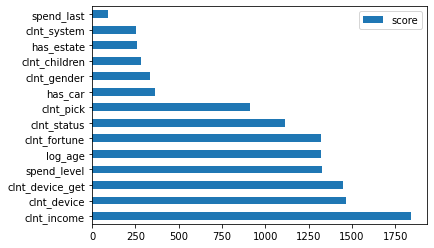

In [80]:
feature_important = modelc.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [81]:
enccc = WOEEncoder(cols=['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level'])

# transform the datasets
enccc.fit(x,y)
tecc_x = enccc.transform(x)
tecc_test = enccc.transform(test)
tecc_t_x,tecc_t_test=scaleColumns(tecc_x,tecc_test)
modelcc = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=3000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
X_train, X_test, y_train, y_test = train_test_split(
tecc_t_x, y, test_size=0.2, stratify=y)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time modelcc.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[11:18:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.37420	validation_1-error:0.44762
[1]	validation_0-error:0.33599	validation_1-error:0.41905
[2]	validation_0-error:0.32245	validation_1-error:0.41905
[3]	validation_0-error:0.28025	validation_1-error:0.40952
[4]	validation_0-error:0.28583	validation_1-error:0.43175
[5]	validation_0-error:0.28822	validation_1-error:0.41905
[6]	validation_0-error:0.27787	validation_1-error:0.41587
[7]	validation_0-error:0.28105	validation_1-error:0.41587
[8]	validation_0-error:0.27388	validation_1-error:0.41587
[9]	validation_0-error:0.25876	validation_1-error:0.40635
[10]	validation_0-error:0.26433	vali

[132]	validation_0-error:0.16481	validation_1-error:0.33651
[133]	validation_0-error:0.16561	validation_1-error:0.33651
[134]	validation_0-error:0.16640	validation_1-error:0.33651
[135]	validation_0-error:0.16481	validation_1-error:0.33968
[136]	validation_0-error:0.16401	validation_1-error:0.33968
[137]	validation_0-error:0.16242	validation_1-error:0.33968
[138]	validation_0-error:0.16162	validation_1-error:0.33651
[139]	validation_0-error:0.16242	validation_1-error:0.33651
[140]	validation_0-error:0.16162	validation_1-error:0.33333
[141]	validation_0-error:0.16083	validation_1-error:0.33651
[142]	validation_0-error:0.15844	validation_1-error:0.33333
[143]	validation_0-error:0.15764	validation_1-error:0.33333
[144]	validation_0-error:0.15844	validation_1-error:0.33333
[145]	validation_0-error:0.15764	validation_1-error:0.33333
[146]	validation_0-error:0.15764	validation_1-error:0.33333
[147]	validation_0-error:0.15446	validation_1-error:0.33651
[148]	validation_0-error:0.15366	validat

[269]	validation_0-error:0.10111	validation_1-error:0.33968
[270]	validation_0-error:0.10191	validation_1-error:0.33968
[271]	validation_0-error:0.10032	validation_1-error:0.33968
[272]	validation_0-error:0.09952	validation_1-error:0.33968
[273]	validation_0-error:0.10032	validation_1-error:0.33651
[274]	validation_0-error:0.09952	validation_1-error:0.33968
[275]	validation_0-error:0.09873	validation_1-error:0.34286
[276]	validation_0-error:0.09873	validation_1-error:0.34286
[277]	validation_0-error:0.09793	validation_1-error:0.34286
[278]	validation_0-error:0.09873	validation_1-error:0.34286
[279]	validation_0-error:0.09952	validation_1-error:0.34286
[280]	validation_0-error:0.09634	validation_1-error:0.34286
[281]	validation_0-error:0.09713	validation_1-error:0.34286
[282]	validation_0-error:0.09554	validation_1-error:0.34603
[283]	validation_0-error:0.09713	validation_1-error:0.34603
[284]	validation_0-error:0.09713	validation_1-error:0.34603
[285]	validation_0-error:0.09713	validat

[406]	validation_0-error:0.06369	validation_1-error:0.34286
[407]	validation_0-error:0.06369	validation_1-error:0.34286
[408]	validation_0-error:0.06290	validation_1-error:0.33968
[409]	validation_0-error:0.06290	validation_1-error:0.33968
[410]	validation_0-error:0.06369	validation_1-error:0.33968
[411]	validation_0-error:0.06369	validation_1-error:0.33968
[412]	validation_0-error:0.06290	validation_1-error:0.34286
[413]	validation_0-error:0.06369	validation_1-error:0.34286
[414]	validation_0-error:0.06369	validation_1-error:0.34286
[415]	validation_0-error:0.06290	validation_1-error:0.34286
[416]	validation_0-error:0.06210	validation_1-error:0.34286
[417]	validation_0-error:0.06290	validation_1-error:0.34286
[418]	validation_0-error:0.06210	validation_1-error:0.34603
[419]	validation_0-error:0.06210	validation_1-error:0.34603
[420]	validation_0-error:0.06051	validation_1-error:0.34921
[421]	validation_0-error:0.06051	validation_1-error:0.34921
[422]	validation_0-error:0.05971	validat

[543]	validation_0-error:0.05016	validation_1-error:0.35238
[544]	validation_0-error:0.04857	validation_1-error:0.35238
[545]	validation_0-error:0.04857	validation_1-error:0.35238
[546]	validation_0-error:0.04857	validation_1-error:0.35238
[547]	validation_0-error:0.04857	validation_1-error:0.35238
[548]	validation_0-error:0.04857	validation_1-error:0.35238
[549]	validation_0-error:0.05016	validation_1-error:0.35238
[550]	validation_0-error:0.05016	validation_1-error:0.35238
[551]	validation_0-error:0.04936	validation_1-error:0.35238
[552]	validation_0-error:0.04777	validation_1-error:0.35238
[553]	validation_0-error:0.04936	validation_1-error:0.35238
[554]	validation_0-error:0.04936	validation_1-error:0.35238
[555]	validation_0-error:0.04857	validation_1-error:0.35238
[556]	validation_0-error:0.04936	validation_1-error:0.35238
[557]	validation_0-error:0.04936	validation_1-error:0.35238
[558]	validation_0-error:0.04857	validation_1-error:0.35238
[559]	validation_0-error:0.04857	validat

[680]	validation_0-error:0.04140	validation_1-error:0.34921
[681]	validation_0-error:0.04140	validation_1-error:0.34603
[682]	validation_0-error:0.04140	validation_1-error:0.34603
[683]	validation_0-error:0.04140	validation_1-error:0.34603
[684]	validation_0-error:0.04140	validation_1-error:0.34603
[685]	validation_0-error:0.04140	validation_1-error:0.34603
[686]	validation_0-error:0.04220	validation_1-error:0.34603
[687]	validation_0-error:0.04220	validation_1-error:0.34603
[688]	validation_0-error:0.04140	validation_1-error:0.34603
[689]	validation_0-error:0.04140	validation_1-error:0.34603
[690]	validation_0-error:0.04140	validation_1-error:0.34603
[691]	validation_0-error:0.04140	validation_1-error:0.34603
[692]	validation_0-error:0.04140	validation_1-error:0.34286
[693]	validation_0-error:0.04140	validation_1-error:0.34603
[694]	validation_0-error:0.04140	validation_1-error:0.34603
[695]	validation_0-error:0.04140	validation_1-error:0.34603
[696]	validation_0-error:0.04140	validat

[817]	validation_0-error:0.03026	validation_1-error:0.33651
[818]	validation_0-error:0.03026	validation_1-error:0.33651
[819]	validation_0-error:0.02946	validation_1-error:0.33651
[820]	validation_0-error:0.03026	validation_1-error:0.33651
[821]	validation_0-error:0.03026	validation_1-error:0.33651
[822]	validation_0-error:0.02946	validation_1-error:0.33651
[823]	validation_0-error:0.02946	validation_1-error:0.33651
[824]	validation_0-error:0.02946	validation_1-error:0.33651
[825]	validation_0-error:0.02946	validation_1-error:0.33651
[826]	validation_0-error:0.03026	validation_1-error:0.33968
[827]	validation_0-error:0.03026	validation_1-error:0.33968
[828]	validation_0-error:0.03026	validation_1-error:0.33651
[829]	validation_0-error:0.03026	validation_1-error:0.33968
[830]	validation_0-error:0.03026	validation_1-error:0.33968
[831]	validation_0-error:0.02946	validation_1-error:0.33651
[832]	validation_0-error:0.02946	validation_1-error:0.33651
[833]	validation_0-error:0.02946	validat

[954]	validation_0-error:0.02548	validation_1-error:0.34286
[955]	validation_0-error:0.02548	validation_1-error:0.34286
[956]	validation_0-error:0.02627	validation_1-error:0.34286
[957]	validation_0-error:0.02627	validation_1-error:0.34286
[958]	validation_0-error:0.02627	validation_1-error:0.34286
[959]	validation_0-error:0.02548	validation_1-error:0.34286
[960]	validation_0-error:0.02548	validation_1-error:0.34286
[961]	validation_0-error:0.02548	validation_1-error:0.34286
[962]	validation_0-error:0.02548	validation_1-error:0.34286
[963]	validation_0-error:0.02548	validation_1-error:0.34286
[964]	validation_0-error:0.02468	validation_1-error:0.34286
[965]	validation_0-error:0.02468	validation_1-error:0.34286
[966]	validation_0-error:0.02468	validation_1-error:0.34286
[967]	validation_0-error:0.02548	validation_1-error:0.34286
[968]	validation_0-error:0.02548	validation_1-error:0.34286
[969]	validation_0-error:0.02548	validation_1-error:0.34286
[970]	validation_0-error:0.02548	validat

[1090]	validation_0-error:0.01911	validation_1-error:0.34286
[1091]	validation_0-error:0.01911	validation_1-error:0.34286
[1092]	validation_0-error:0.01911	validation_1-error:0.34286
[1093]	validation_0-error:0.01831	validation_1-error:0.34603
[1094]	validation_0-error:0.01831	validation_1-error:0.34603
[1095]	validation_0-error:0.01831	validation_1-error:0.34921
[1096]	validation_0-error:0.01831	validation_1-error:0.34603
[1097]	validation_0-error:0.01831	validation_1-error:0.34603
[1098]	validation_0-error:0.01831	validation_1-error:0.34286
[1099]	validation_0-error:0.01831	validation_1-error:0.34603
[1100]	validation_0-error:0.01831	validation_1-error:0.34603
[1101]	validation_0-error:0.01831	validation_1-error:0.34603
[1102]	validation_0-error:0.01831	validation_1-error:0.34603
[1103]	validation_0-error:0.01831	validation_1-error:0.34603
[1104]	validation_0-error:0.01831	validation_1-error:0.34603
[1105]	validation_0-error:0.01831	validation_1-error:0.34603
[1106]	validation_0-erro

[1225]	validation_0-error:0.01672	validation_1-error:0.33968
[1226]	validation_0-error:0.01672	validation_1-error:0.34286
[1227]	validation_0-error:0.01672	validation_1-error:0.34286
[1228]	validation_0-error:0.01672	validation_1-error:0.34286
[1229]	validation_0-error:0.01672	validation_1-error:0.34286
[1230]	validation_0-error:0.01672	validation_1-error:0.34603
[1231]	validation_0-error:0.01672	validation_1-error:0.34603
[1232]	validation_0-error:0.01672	validation_1-error:0.34603
[1233]	validation_0-error:0.01672	validation_1-error:0.34603
[1234]	validation_0-error:0.01672	validation_1-error:0.34603
[1235]	validation_0-error:0.01672	validation_1-error:0.34286
[1236]	validation_0-error:0.01672	validation_1-error:0.34286
[1237]	validation_0-error:0.01672	validation_1-error:0.34603
[1238]	validation_0-error:0.01672	validation_1-error:0.34603
[1239]	validation_0-error:0.01672	validation_1-error:0.34603
[1240]	validation_0-error:0.01672	validation_1-error:0.34603
[1241]	validation_0-erro

[1360]	validation_0-error:0.01513	validation_1-error:0.34603
[1361]	validation_0-error:0.01513	validation_1-error:0.34603
[1362]	validation_0-error:0.01513	validation_1-error:0.34603
[1363]	validation_0-error:0.01513	validation_1-error:0.34603
[1364]	validation_0-error:0.01513	validation_1-error:0.34603
[1365]	validation_0-error:0.01513	validation_1-error:0.34286
[1366]	validation_0-error:0.01513	validation_1-error:0.34603
[1367]	validation_0-error:0.01513	validation_1-error:0.34286
[1368]	validation_0-error:0.01513	validation_1-error:0.34603
[1369]	validation_0-error:0.01513	validation_1-error:0.34603
[1370]	validation_0-error:0.01513	validation_1-error:0.34603
[1371]	validation_0-error:0.01513	validation_1-error:0.34603
[1372]	validation_0-error:0.01513	validation_1-error:0.34603
[1373]	validation_0-error:0.01513	validation_1-error:0.34286
[1374]	validation_0-error:0.01513	validation_1-error:0.34286
[1375]	validation_0-error:0.01513	validation_1-error:0.34286
[1376]	validation_0-erro

[1495]	validation_0-error:0.01115	validation_1-error:0.34921
[1496]	validation_0-error:0.01115	validation_1-error:0.34921
[1497]	validation_0-error:0.01115	validation_1-error:0.34921
[1498]	validation_0-error:0.01115	validation_1-error:0.34921
[1499]	validation_0-error:0.01115	validation_1-error:0.34921
[1500]	validation_0-error:0.01115	validation_1-error:0.34921
[1501]	validation_0-error:0.01115	validation_1-error:0.34921
[1502]	validation_0-error:0.01115	validation_1-error:0.34921
[1503]	validation_0-error:0.01115	validation_1-error:0.34921
[1504]	validation_0-error:0.01115	validation_1-error:0.34921
[1505]	validation_0-error:0.01115	validation_1-error:0.34921
[1506]	validation_0-error:0.01115	validation_1-error:0.34921
[1507]	validation_0-error:0.01115	validation_1-error:0.34921
[1508]	validation_0-error:0.01115	validation_1-error:0.34921
[1509]	validation_0-error:0.01115	validation_1-error:0.34921
[1510]	validation_0-error:0.01115	validation_1-error:0.34921
[1511]	validation_0-erro

[1630]	validation_0-error:0.01035	validation_1-error:0.35556
[1631]	validation_0-error:0.01035	validation_1-error:0.35556
[1632]	validation_0-error:0.01115	validation_1-error:0.35238
[1633]	validation_0-error:0.01115	validation_1-error:0.35238
[1634]	validation_0-error:0.01035	validation_1-error:0.35238
[1635]	validation_0-error:0.01035	validation_1-error:0.35556
[1636]	validation_0-error:0.01115	validation_1-error:0.35556
[1637]	validation_0-error:0.01115	validation_1-error:0.35238
[1638]	validation_0-error:0.01115	validation_1-error:0.35556
[1639]	validation_0-error:0.01115	validation_1-error:0.35238
[1640]	validation_0-error:0.01115	validation_1-error:0.35556
[1641]	validation_0-error:0.01115	validation_1-error:0.35238
[1642]	validation_0-error:0.01115	validation_1-error:0.35238
[1643]	validation_0-error:0.01115	validation_1-error:0.35238
[1644]	validation_0-error:0.01115	validation_1-error:0.35238
[1645]	validation_0-error:0.01115	validation_1-error:0.35238
[1646]	validation_0-erro

[1765]	validation_0-error:0.00876	validation_1-error:0.35873
[1766]	validation_0-error:0.00876	validation_1-error:0.35873
[1767]	validation_0-error:0.00876	validation_1-error:0.35873
[1768]	validation_0-error:0.00955	validation_1-error:0.35873
[1769]	validation_0-error:0.00955	validation_1-error:0.35873
[1770]	validation_0-error:0.00955	validation_1-error:0.35873
[1771]	validation_0-error:0.00876	validation_1-error:0.35873
[1772]	validation_0-error:0.00876	validation_1-error:0.35873
[1773]	validation_0-error:0.00876	validation_1-error:0.35873
[1774]	validation_0-error:0.00955	validation_1-error:0.35873
[1775]	validation_0-error:0.00955	validation_1-error:0.35873
[1776]	validation_0-error:0.00876	validation_1-error:0.35556
[1777]	validation_0-error:0.00876	validation_1-error:0.35873
[1778]	validation_0-error:0.00876	validation_1-error:0.35873
[1779]	validation_0-error:0.00876	validation_1-error:0.35873
[1780]	validation_0-error:0.00876	validation_1-error:0.35556
[1781]	validation_0-erro

[1900]	validation_0-error:0.00876	validation_1-error:0.35238
[1901]	validation_0-error:0.00876	validation_1-error:0.35238
[1902]	validation_0-error:0.00876	validation_1-error:0.35238
[1903]	validation_0-error:0.00876	validation_1-error:0.35238
[1904]	validation_0-error:0.00876	validation_1-error:0.35238
[1905]	validation_0-error:0.00876	validation_1-error:0.35238
[1906]	validation_0-error:0.00876	validation_1-error:0.35238
[1907]	validation_0-error:0.00876	validation_1-error:0.35238
[1908]	validation_0-error:0.00876	validation_1-error:0.35238
[1909]	validation_0-error:0.00876	validation_1-error:0.35238
[1910]	validation_0-error:0.00876	validation_1-error:0.35238
[1911]	validation_0-error:0.00876	validation_1-error:0.35238
[1912]	validation_0-error:0.00876	validation_1-error:0.35238
[1913]	validation_0-error:0.00876	validation_1-error:0.35238
[1914]	validation_0-error:0.00876	validation_1-error:0.35238
[1915]	validation_0-error:0.00876	validation_1-error:0.35238
[1916]	validation_0-erro

[2035]	validation_0-error:0.00876	validation_1-error:0.34603
[2036]	validation_0-error:0.00876	validation_1-error:0.34603
[2037]	validation_0-error:0.00876	validation_1-error:0.34921
[2038]	validation_0-error:0.00876	validation_1-error:0.34921
[2039]	validation_0-error:0.00876	validation_1-error:0.34921
[2040]	validation_0-error:0.00876	validation_1-error:0.34921
[2041]	validation_0-error:0.00876	validation_1-error:0.34921
[2042]	validation_0-error:0.00876	validation_1-error:0.34603
[2043]	validation_0-error:0.00876	validation_1-error:0.34603
[2044]	validation_0-error:0.00876	validation_1-error:0.34603
[2045]	validation_0-error:0.00876	validation_1-error:0.34603
[2046]	validation_0-error:0.00876	validation_1-error:0.34603
[2047]	validation_0-error:0.00876	validation_1-error:0.34603
[2048]	validation_0-error:0.00876	validation_1-error:0.34603
[2049]	validation_0-error:0.00876	validation_1-error:0.34603
[2050]	validation_0-error:0.00876	validation_1-error:0.34603
[2051]	validation_0-erro

[2170]	validation_0-error:0.00796	validation_1-error:0.34603
[2171]	validation_0-error:0.00796	validation_1-error:0.34603
[2172]	validation_0-error:0.00796	validation_1-error:0.34603
[2173]	validation_0-error:0.00796	validation_1-error:0.34603
[2174]	validation_0-error:0.00796	validation_1-error:0.34603
[2175]	validation_0-error:0.00796	validation_1-error:0.34921
[2176]	validation_0-error:0.00796	validation_1-error:0.34921
[2177]	validation_0-error:0.00796	validation_1-error:0.34921
[2178]	validation_0-error:0.00796	validation_1-error:0.34921
[2179]	validation_0-error:0.00796	validation_1-error:0.34603
[2180]	validation_0-error:0.00796	validation_1-error:0.34921
[2181]	validation_0-error:0.00796	validation_1-error:0.34921
[2182]	validation_0-error:0.00796	validation_1-error:0.34921
[2183]	validation_0-error:0.00796	validation_1-error:0.34603
[2184]	validation_0-error:0.00796	validation_1-error:0.34603
[2185]	validation_0-error:0.00796	validation_1-error:0.34921
[2186]	validation_0-erro

[2305]	validation_0-error:0.00717	validation_1-error:0.34603
[2306]	validation_0-error:0.00717	validation_1-error:0.34603
[2307]	validation_0-error:0.00717	validation_1-error:0.34603
[2308]	validation_0-error:0.00717	validation_1-error:0.34603
[2309]	validation_0-error:0.00717	validation_1-error:0.34603
[2310]	validation_0-error:0.00717	validation_1-error:0.34603
[2311]	validation_0-error:0.00717	validation_1-error:0.34603
[2312]	validation_0-error:0.00717	validation_1-error:0.34603
[2313]	validation_0-error:0.00717	validation_1-error:0.34603
[2314]	validation_0-error:0.00717	validation_1-error:0.34603
[2315]	validation_0-error:0.00717	validation_1-error:0.34603
[2316]	validation_0-error:0.00717	validation_1-error:0.34603
[2317]	validation_0-error:0.00717	validation_1-error:0.34603
[2318]	validation_0-error:0.00717	validation_1-error:0.34286
[2319]	validation_0-error:0.00717	validation_1-error:0.34286
[2320]	validation_0-error:0.00717	validation_1-error:0.34603
[2321]	validation_0-erro

[2440]	validation_0-error:0.00717	validation_1-error:0.34921
[2441]	validation_0-error:0.00717	validation_1-error:0.34921
[2442]	validation_0-error:0.00717	validation_1-error:0.34921
[2443]	validation_0-error:0.00717	validation_1-error:0.34921
[2444]	validation_0-error:0.00717	validation_1-error:0.34921
[2445]	validation_0-error:0.00717	validation_1-error:0.35238
[2446]	validation_0-error:0.00717	validation_1-error:0.34921
[2447]	validation_0-error:0.00717	validation_1-error:0.34921
[2448]	validation_0-error:0.00717	validation_1-error:0.34921
[2449]	validation_0-error:0.00717	validation_1-error:0.34921
[2450]	validation_0-error:0.00717	validation_1-error:0.34921
[2451]	validation_0-error:0.00717	validation_1-error:0.34921
[2452]	validation_0-error:0.00717	validation_1-error:0.35238
[2453]	validation_0-error:0.00717	validation_1-error:0.34921
[2454]	validation_0-error:0.00717	validation_1-error:0.34921
[2455]	validation_0-error:0.00717	validation_1-error:0.34921
[2456]	validation_0-erro

[2575]	validation_0-error:0.00717	validation_1-error:0.34921
[2576]	validation_0-error:0.00717	validation_1-error:0.34921
[2577]	validation_0-error:0.00717	validation_1-error:0.34921
[2578]	validation_0-error:0.00717	validation_1-error:0.34921
[2579]	validation_0-error:0.00717	validation_1-error:0.34921
[2580]	validation_0-error:0.00717	validation_1-error:0.34921
[2581]	validation_0-error:0.00717	validation_1-error:0.34921
[2582]	validation_0-error:0.00717	validation_1-error:0.34921
[2583]	validation_0-error:0.00717	validation_1-error:0.34921
[2584]	validation_0-error:0.00717	validation_1-error:0.34921
[2585]	validation_0-error:0.00717	validation_1-error:0.34921
[2586]	validation_0-error:0.00717	validation_1-error:0.34921
[2587]	validation_0-error:0.00717	validation_1-error:0.34921
[2588]	validation_0-error:0.00717	validation_1-error:0.34921
[2589]	validation_0-error:0.00717	validation_1-error:0.34921
[2590]	validation_0-error:0.00717	validation_1-error:0.34921
[2591]	validation_0-erro

[2710]	validation_0-error:0.00557	validation_1-error:0.34921
[2711]	validation_0-error:0.00557	validation_1-error:0.34921
[2712]	validation_0-error:0.00557	validation_1-error:0.34921
[2713]	validation_0-error:0.00557	validation_1-error:0.34921
[2714]	validation_0-error:0.00557	validation_1-error:0.34921
[2715]	validation_0-error:0.00557	validation_1-error:0.34921
[2716]	validation_0-error:0.00557	validation_1-error:0.34921
[2717]	validation_0-error:0.00557	validation_1-error:0.34921
[2718]	validation_0-error:0.00557	validation_1-error:0.34921
[2719]	validation_0-error:0.00557	validation_1-error:0.34921
[2720]	validation_0-error:0.00557	validation_1-error:0.34921
[2721]	validation_0-error:0.00557	validation_1-error:0.34921
[2722]	validation_0-error:0.00557	validation_1-error:0.34921
[2723]	validation_0-error:0.00557	validation_1-error:0.34921
[2724]	validation_0-error:0.00557	validation_1-error:0.34921
[2725]	validation_0-error:0.00557	validation_1-error:0.34921
[2726]	validation_0-erro

[2845]	validation_0-error:0.00557	validation_1-error:0.35238
[2846]	validation_0-error:0.00557	validation_1-error:0.35238
[2847]	validation_0-error:0.00557	validation_1-error:0.35238
[2848]	validation_0-error:0.00557	validation_1-error:0.34921
[2849]	validation_0-error:0.00557	validation_1-error:0.34921
[2850]	validation_0-error:0.00557	validation_1-error:0.34921
[2851]	validation_0-error:0.00557	validation_1-error:0.34921
[2852]	validation_0-error:0.00557	validation_1-error:0.34921
[2853]	validation_0-error:0.00557	validation_1-error:0.34921
[2854]	validation_0-error:0.00557	validation_1-error:0.34921
[2855]	validation_0-error:0.00557	validation_1-error:0.34921
[2856]	validation_0-error:0.00557	validation_1-error:0.34921
[2857]	validation_0-error:0.00557	validation_1-error:0.34921
[2858]	validation_0-error:0.00557	validation_1-error:0.34921
[2859]	validation_0-error:0.00557	validation_1-error:0.34921
[2860]	validation_0-error:0.00557	validation_1-error:0.34921
[2861]	validation_0-erro

[2980]	validation_0-error:0.00557	validation_1-error:0.34921
[2981]	validation_0-error:0.00557	validation_1-error:0.34921
[2982]	validation_0-error:0.00557	validation_1-error:0.34921
[2983]	validation_0-error:0.00557	validation_1-error:0.34921
[2984]	validation_0-error:0.00557	validation_1-error:0.34921
[2985]	validation_0-error:0.00557	validation_1-error:0.34921
[2986]	validation_0-error:0.00557	validation_1-error:0.34921
[2987]	validation_0-error:0.00557	validation_1-error:0.34921
[2988]	validation_0-error:0.00557	validation_1-error:0.34921
[2989]	validation_0-error:0.00557	validation_1-error:0.34921
[2990]	validation_0-error:0.00557	validation_1-error:0.34921
[2991]	validation_0-error:0.00557	validation_1-error:0.34921
[2992]	validation_0-error:0.00557	validation_1-error:0.34921
[2993]	validation_0-error:0.00557	validation_1-error:0.34921
[2994]	validation_0-error:0.00557	validation_1-error:0.34921
[2995]	validation_0-error:0.00557	validation_1-error:0.34921
[2996]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

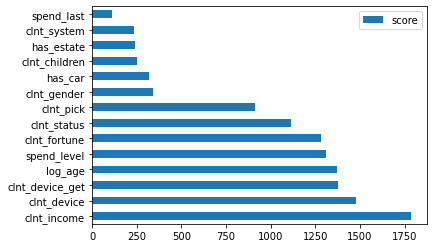

In [82]:
feature_important = modelcc.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

Вне зависимости от типа энкодинга, clnt_income имеет наибольшее влияние, попробую отправить пока это, вдруг зайдет

In [83]:
sam=pd.read_csv('sample_submit.csv')
sam

clnt_id  is_premium
0        2018           0
1        2029           0
2        2035           0
3        2060           0
4        2063           0
...       ...         ...
1356     4984           0
1357     4986           0
1358     4987           0
1359     4991           0
1360     4994           0

[1361 rows x 2 columns]

In [84]:
np.unique(modelc.predict(tec_t_test))

array([1.])

если тупо проставить все 1, то будет 0,4

In [85]:
q=crm_data.loc[(crm_data['is_premium'] == 1)].index

In [86]:
for i in q:
    sam.loc[sam['clnt_id']==i,'is_premium']=1
print(len(q))

755


In [87]:
for i in sam.index:
    print(sam.loc[i,:])

clnt_id       2018
is_premium       0
Name: 0, dtype: int64
clnt_id       2029
is_premium       0
Name: 1, dtype: int64
clnt_id       2035
is_premium       0
Name: 2, dtype: int64
clnt_id       2060
is_premium       0
Name: 3, dtype: int64
clnt_id       2063
is_premium       0
Name: 4, dtype: int64
clnt_id       2064
is_premium       0
Name: 5, dtype: int64
clnt_id       2086
is_premium       0
Name: 6, dtype: int64
clnt_id       2095
is_premium       0
Name: 7, dtype: int64
clnt_id       2119
is_premium       0
Name: 8, dtype: int64
clnt_id       2145
is_premium       0
Name: 9, dtype: int64
clnt_id       2148
is_premium       0
Name: 10, dtype: int64
clnt_id       2153
is_premium       0
Name: 11, dtype: int64
clnt_id       2157
is_premium       0
Name: 12, dtype: int64
clnt_id       2159
is_premium       0
Name: 13, dtype: int64
clnt_id       2184
is_premium       0
Name: 14, dtype: int64
clnt_id       2204
is_premium       0
Name: 15, dtype: int64
clnt_id       2214
is_premium     

Name: 209, dtype: int64
clnt_id       2201
is_premium       0
Name: 210, dtype: int64
clnt_id       2202
is_premium       0
Name: 211, dtype: int64
clnt_id       2205
is_premium       0
Name: 212, dtype: int64
clnt_id       2206
is_premium       0
Name: 213, dtype: int64
clnt_id       2208
is_premium       0
Name: 214, dtype: int64
clnt_id       2217
is_premium       0
Name: 215, dtype: int64
clnt_id       2218
is_premium       0
Name: 216, dtype: int64
clnt_id       2219
is_premium       0
Name: 217, dtype: int64
clnt_id       2221
is_premium       0
Name: 218, dtype: int64
clnt_id       2223
is_premium       0
Name: 219, dtype: int64
clnt_id       2228
is_premium       0
Name: 220, dtype: int64
clnt_id       2230
is_premium       0
Name: 221, dtype: int64
clnt_id       2231
is_premium       0
Name: 222, dtype: int64
clnt_id       2233
is_premium       0
Name: 223, dtype: int64
clnt_id       2234
is_premium       0
Name: 224, dtype: int64
clnt_id       2236
is_premium       0
Name: 22

Name: 443, dtype: int64
clnt_id       2795
is_premium       0
Name: 444, dtype: int64
clnt_id       2796
is_premium       0
Name: 445, dtype: int64
clnt_id       2799
is_premium       0
Name: 446, dtype: int64
clnt_id       2800
is_premium       1
Name: 447, dtype: int64
clnt_id       2801
is_premium       0
Name: 448, dtype: int64
clnt_id       2804
is_premium       0
Name: 449, dtype: int64
clnt_id       2806
is_premium       0
Name: 450, dtype: int64
clnt_id       2807
is_premium       0
Name: 451, dtype: int64
clnt_id       2808
is_premium       0
Name: 452, dtype: int64
clnt_id       2809
is_premium       0
Name: 453, dtype: int64
clnt_id       2815
is_premium       0
Name: 454, dtype: int64
clnt_id       2818
is_premium       0
Name: 455, dtype: int64
clnt_id       2820
is_premium       0
Name: 456, dtype: int64
clnt_id       2823
is_premium       0
Name: 457, dtype: int64
clnt_id       2825
is_premium       0
Name: 458, dtype: int64
clnt_id       2830
is_premium       0
Name: 45

Name: 690, dtype: int64
clnt_id       3394
is_premium       0
Name: 691, dtype: int64
clnt_id       3397
is_premium       0
Name: 692, dtype: int64
clnt_id       3398
is_premium       0
Name: 693, dtype: int64
clnt_id       3399
is_premium       0
Name: 694, dtype: int64
clnt_id       3400
is_premium       0
Name: 695, dtype: int64
clnt_id       3401
is_premium       0
Name: 696, dtype: int64
clnt_id       3403
is_premium       0
Name: 697, dtype: int64
clnt_id       3407
is_premium       0
Name: 698, dtype: int64
clnt_id       3410
is_premium       0
Name: 699, dtype: int64
clnt_id       3411
is_premium       0
Name: 700, dtype: int64
clnt_id       3418
is_premium       0
Name: 701, dtype: int64
clnt_id       3419
is_premium       0
Name: 702, dtype: int64
clnt_id       3421
is_premium       0
Name: 703, dtype: int64
clnt_id       3423
is_premium       0
Name: 704, dtype: int64
clnt_id       3424
is_premium       0
Name: 705, dtype: int64
clnt_id       3428
is_premium       0
Name: 70

Name: 944, dtype: int64
clnt_id       3998
is_premium       0
Name: 945, dtype: int64
clnt_id       3999
is_premium       0
Name: 946, dtype: int64
clnt_id       4001
is_premium       0
Name: 947, dtype: int64
clnt_id       4007
is_premium       0
Name: 948, dtype: int64
clnt_id       4008
is_premium       0
Name: 949, dtype: int64
clnt_id       4010
is_premium       0
Name: 950, dtype: int64
clnt_id       4021
is_premium       0
Name: 951, dtype: int64
clnt_id       4023
is_premium       0
Name: 952, dtype: int64
clnt_id       4024
is_premium       0
Name: 953, dtype: int64
clnt_id       4025
is_premium       0
Name: 954, dtype: int64
clnt_id       4026
is_premium       0
Name: 955, dtype: int64
clnt_id       4030
is_premium       0
Name: 956, dtype: int64
clnt_id       4033
is_premium       0
Name: 957, dtype: int64
clnt_id       4035
is_premium       0
Name: 958, dtype: int64
clnt_id       4037
is_premium       0
Name: 959, dtype: int64
clnt_id       4039
is_premium       0
Name: 96

Name: 1194, dtype: int64
clnt_id       4619
is_premium       0
Name: 1195, dtype: int64
clnt_id       4620
is_premium       0
Name: 1196, dtype: int64
clnt_id       4621
is_premium       0
Name: 1197, dtype: int64
clnt_id       4622
is_premium       0
Name: 1198, dtype: int64
clnt_id       4628
is_premium       0
Name: 1199, dtype: int64
clnt_id       4629
is_premium       0
Name: 1200, dtype: int64
clnt_id       4630
is_premium       0
Name: 1201, dtype: int64
clnt_id       4632
is_premium       0
Name: 1202, dtype: int64
clnt_id       4633
is_premium       0
Name: 1203, dtype: int64
clnt_id       4634
is_premium       0
Name: 1204, dtype: int64
clnt_id       4635
is_premium       0
Name: 1205, dtype: int64
clnt_id       4636
is_premium       0
Name: 1206, dtype: int64
clnt_id       4637
is_premium       0
Name: 1207, dtype: int64
clnt_id       4640
is_premium       0
Name: 1208, dtype: int64
clnt_id       4641
is_premium       0
Name: 1209, dtype: int64
clnt_id       4643
is_premium 

In [88]:
sam.to_csv('submission.csv', index=False)

In [89]:
w=crm_data.loc[(crm_data['is_premium']==1) | (crm_data['is_premium']==0),['clnt_id','is_premium']]

In [90]:
w.to_csv('is_prem.csv',index=False)